## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (name, surname, student id)
Name: Gökdeniz
Surname: Kuruca
Student ID: 2230356129

## Understanding Perceptron Learning Algorithm (100 points)

### 1. Data Loading and Exploration (5 points)

#### Brief Overview of the Task

The study first applies a **Perceptron algorithm** to perform **binary classification** between two raisin types. The Perceptron iteratively adjusts its decision boundary to separate the two classes in a **2D feature space**, demonstrating how linear classifiers learn from data.

Afterward, **Fisher’s Linear Discriminant** is used to project the same data onto a **1D space** that maximizes the distance between the class means while minimizing variance within each class. This step highlights how dimensionality reduction can enhance interpretability and show class separation more clearly.

#### Description of the Dataset

The **Raisin Dataset** includes **900 samples**, evenly divided into two classes: **Besni** and **Kecimen**. Each sample is represented by **7 features** such as area, perimeter, major and minor axis lengths, eccentricity, and compactness. These geometric descriptors are derived from raisin images and effectively capture the size and shape differences between the two varieties.


In [48]:
# Since it's being developed in the Colab environment, the libraries must be downloaded beforehand.
# If it's being run in a non-Collab environment, the other libraries in the libraries section must also be installed.
!pip install ucimlrepo

#### 1.1 Libraries

In this project, several Python libraries are used for data analysis, visualization, and model implementation.  

Below is a brief explanation about how it is used within this project:

- **random**: Used to generate random values for sampling and shuffling data.  
- **itertools**: Helps create parameter combinations for grid search.  
- **numpy**: Handles numerical operations and vectorized calculations in the model.  
- **pandas**: Manages the dataset and preprocessing steps.  
- **seaborn**: Used for quick and clear data visualizations.  
- **tqdm**: Displays progress bars during training and iterations.  
- **scipy.stats**: Provides statistical functions for data normalization and analysis.  
- **ucimlrepo**: Fetches the dataset directly from the UCI Machine Learning Repository.  
- **matplotlib.pyplot**: Used to plot data distributions and model results.  
- **sklearn.model_selection.train_test_split**: Splits the dataset into training and test sets.


In [49]:
## Import necessary libraries
import random
import itertools

import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from scipy import stats
from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#### 1.2 Dataset

The dataset contains 900 raisin samples, 450 from Kecimen and 450 from Besni varieties.  

Each sample has 7 features from images obtained using CVS.  

The task is a binary classification problem aiming to raisin types based on their properties.

**Dataset details:**  
- Type: Multivariate, Classification  
- Features: 7 (Real and Integer)  
- Instances: 900  
- Missing values: None  
- Source: UCI Machine Learning Repository  

**Feature descriptions:**  
- Area: Number of pixels within the raisin boundary.  
- MajorAxisLength: Length of the longest axis of the raisin.  
- MinorAxisLength: Length of the shortest axis of the raisin.  
- Eccentricity: Shape measure based on ellipse similarity.  
- ConvexArea: Number of pixels in the convex region of the raisin.  
- Extent: Ratio of raisin area to the bounding box area.  
- Perimeter: Total boundary length of the raisin.  
- Class: Target variable (Kecimen or Besni).

**Reference:**  
Çınar, İ., Koklu, M., & Tasdemir, S. (2020). *Raisin [Dataset]*. UCI Machine Learning Repository. [https://doi.org/10.24432/C5660T](https://doi.org/10.24432/C5660T)

In [50]:
# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)

{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'ID': 261, 'type': 'NATIVE', 'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar

#### 1.3 Exploratory Data Analysis (EDA)

The dataset is initially explored to understand its structure, feature types, and statistical properties. Summary statistics and basic information are examined to check feature distributions and data types, which helps in identifying any anomalies, outliers, or inconsistencies that could affect model performance. Each column is also inspected for missing values to determine whether missing value handling or removal is necessary before training.

The target variable distribution is visualized to verify the balance between Kecimen and Besni classes. Ensuring balanced classes is important because an imbalance could bias the model, requiring techniques such as oversampling or undersampling to correct it. Features are also separated into numeric and categorical types to allow for appropriate preprocessing, including scaling numeric features and encoding categorical variables if needed.

Additionally, column names and the total number of features are stored for reference in later steps, such as feature selection or iterative operations. Feature correlations are inspected to identify highly related or redundant attributes, providing insights into relationships between variables. After completing these exploratory checks, the feature matrix **X** and target vector **y** are converted into NumPy arrays to prepare the data for efficient preprocessing and model training.


In [51]:
# Display summary information for each feature
print("Summary statistics:")
print(X.describe())

Summary statistics:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.000000    0.707367  1119.5090

In [52]:
# Type and null check for each feature
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.3 KB
None


In [53]:
# Inspect feature types, dataset shape, and target distribution
print("Shape of features:",X.shape)
print("Feature names:",X.columns.tolist())
print("Numeric features:",X.select_dtypes(include=['int64', 'float64']).columns.tolist())
print("Categorical features:",X.select_dtypes(include=['object', 'category']).columns.tolist())
print("Target names:",np.unique(y.values))
print("Target distribution:",y.value_counts())

Shape of features: (900, 7)
Feature names: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
Numeric features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
Categorical features: []
Target names: ['Besni' 'Kecimen']
Target distribution: Class  
Besni      450
Kecimen    450
Name: count, dtype: int64


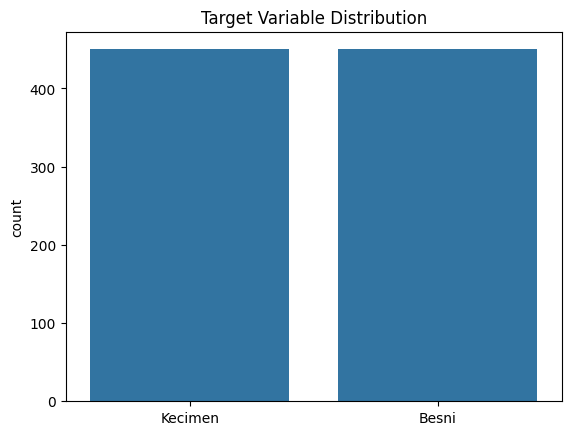

In [54]:
sns.countplot(x=y.values.flatten())
plt.title("Target Variable Distribution")
plt.show()

In [55]:
# Check for missing values
print("Missing value analysis:")
for column in X.columns:
    missing_count = X[column].isnull().sum()
    missing_percentage = (missing_count / len(X)) * 100
    print(f"Column {column}: {missing_count} missing values ({missing_percentage:.2f}%)")

Missing value analysis:
Column Area: 0 missing values (0.00%)
Column MajorAxisLength: 0 missing values (0.00%)
Column MinorAxisLength: 0 missing values (0.00%)
Column Eccentricity: 0 missing values (0.00%)
Column ConvexArea: 0 missing values (0.00%)
Column Extent: 0 missing values (0.00%)
Column Perimeter: 0 missing values (0.00%)


In [56]:
print("First 5 feature:")
print(X.head())

First 5 feature:
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  


In [57]:
print("Correlation of features:")
print(X.corr())

Correlation of features:
                     Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.932774         0.906650      0.336107   
MajorAxisLength  0.932774         1.000000         0.728030      0.583608   
MinorAxisLength  0.906650         0.728030         1.000000     -0.027683   
Eccentricity     0.336107         0.583608        -0.027683      1.000000   
ConvexArea       0.995920         0.945031         0.895651      0.348210   
Extent          -0.013499        -0.203866         0.145322     -0.361061   
Perimeter        0.961352         0.977978         0.827417      0.447845   

                 ConvexArea    Extent  Perimeter  
Area               0.995920 -0.013499   0.961352  
MajorAxisLength    0.945031 -0.203866   0.977978  
MinorAxisLength    0.895651  0.145322   0.827417  
Eccentricity       0.348210 -0.361061   0.447845  
ConvexArea         1.000000 -0.054802   0.976612  
Extent            -0.054802  1.000000  -0.173449  
P

In [58]:
N_FEATURES = X.shape[1]
COLUMNS = X.columns.tolist()

In [59]:
# Copy original data and convert it numpy array
X_original = X.copy()
y_original = y.copy()

X = X.to_numpy()
y = y.to_numpy()

#### 1.4 Results

The exploratory analysis confirmed that the dataset contains 900 raisin samples, evenly split between the Kecimen and Besni classes, and includes seven features. No missing values were detected in any feature, which indicates that the dataset is clean and ready for preprocessing. Summary statistics revealed a wide range of values across features, reflecting variability in raisin size and shape.

The dataset consists entirely of numeric features, with the target variable being categorical. This simplifies preprocessing, as no categorical encoding is required, and numeric scaling can be applied directly. The correlation analysis showed strong positive correlations among size-related features such as Area, MajorAxisLength, MinorAxisLength, ConvexArea, and Perimeter, suggesting potential redundancy. On the other hand, features like Extent and Eccentricity are less correlated with size measures, indicating that they may capture complementary information about raisin shape.

The target distribution confirmed that the dataset is perfectly balanced between the two classes, which reduces the need for resampling techniques. Overall, the dataset is well-structured and suitable for training a classification model, providing a reliable basis for further preprocessing, scaling, and model development.


### 2. Data Preprocessing (5 points)

#### 2.1 Feature Scaling

Feature scaling is crucial for many machine learning algorithms. Scaling ensures that all features contribute equally and helps models converge faster.

Some commonly used feature scaling techniques include:

1. **Standardization:**  
   Scales features to have a mean of 0 and a standard deviation of 1.  
   - **When to use:** Data is roughly Gaussian without extreme outliers.  
   - **Advantages:** Preserves the distribution shape, widely used.  
   - **Disadvantages:** Sensitive to outliers.  
   - **Perceptron compatibility:** Works well since zero-centered features improve gradient updates.

2. **Min-Max Scaling:**  
   Scales features to a fixed range, typically [0, 1].  
   - **When to use:** When bounded feature values are desired.
   - **Advantages:** Maintains relative distances, preserves original distribution.  
   - **Disadvantages:** Sensitive to outliers; extreme values can compress the data.  
   - **Perceptron compatibility:** Can work but may slow convergence if outliers exist.

3. **Robust Scaling:**  
   Scales features using median and interquartile range (IQR), reducing outlier impact.  
   - **When to use:** Skewed data or datasets with extreme values.  
   - **Advantages:** Minimizes influence of outliers, preserves relative feature relationships.  
   - **Disadvantages:** Data may not be zero-centered or unit variance.  
   - **Perceptron compatibility:** Suitable for datasets with outliers; improves stability and convergence.

Before applying these scaling techniques, the dataset is analyzed to determine which methods are most suitable.

Skewness and outlier tests are performed for each feature, and the distributions are visualized with histograms and boxplots.

This analysis helps decide whether standardization, min-max scaling, or robust scaling is more appropriate for the data, ensuring better performance for the model.


In [60]:
def find_outlier_and_skew(data, lower_bound=25, upper_bound=75, columns=None):
  """
  Print number of outliers and skewness for each feature.

  Parameters:
    data (np.ndarray): Numeric dataset where each column is a feature
    lower_bound (int): Lower percentile for IQR calculation (default=25)
    upper_bound (int): Upper percentile for IQR calculation (default=75)
    columns (list of str): Column names for printing (default=None)
  """
  for i in range(data.shape[1]):
    col = data[:, i]

    # Find percentiles
    q1, q3 = np.percentile(col, [lower_bound, upper_bound])
    iqr = q3 - q1
    low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = ((col < low) | (col > high)).sum()

    # Calculate stats from data
    mean = np.mean(col)
    std = np.std(col)
    col_skew = np.mean((col - mean) ** 3) / (std ** 3)

    print(f"{columns[i]}: Outliers={outliers}, Skew={col_skew:.3f}")


In [61]:
def create_plots(data, title):
  """
  Create histogram and boxplot for a given dataset.

  Parameters
    data (array-like): Numeric data to plot
    title (str): Title used for both plots
  """
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  ax1, ax2 = axes

  # Histogram
  ax1.hist(data)
  ax1.set_title(f"{title} Histogram")

  # Boxplot
  ax2.boxplot(data)
  ax2.set_title(f"{title} Boxplot")


In [62]:
# Find outliers and skew value of features
find_outlier_and_skew(X, columns=COLUMNS)

Area: Outliers=41, Skew=1.173
MajorAxisLength: Outliers=17, Skew=0.988
MinorAxisLength: Outliers=26, Skew=0.799
Eccentricity: Outliers=43, Skew=-1.325
ConvexArea: Outliers=42, Skew=1.241
Extent: Outliers=21, Skew=-1.150
Perimeter: Outliers=17, Skew=1.016


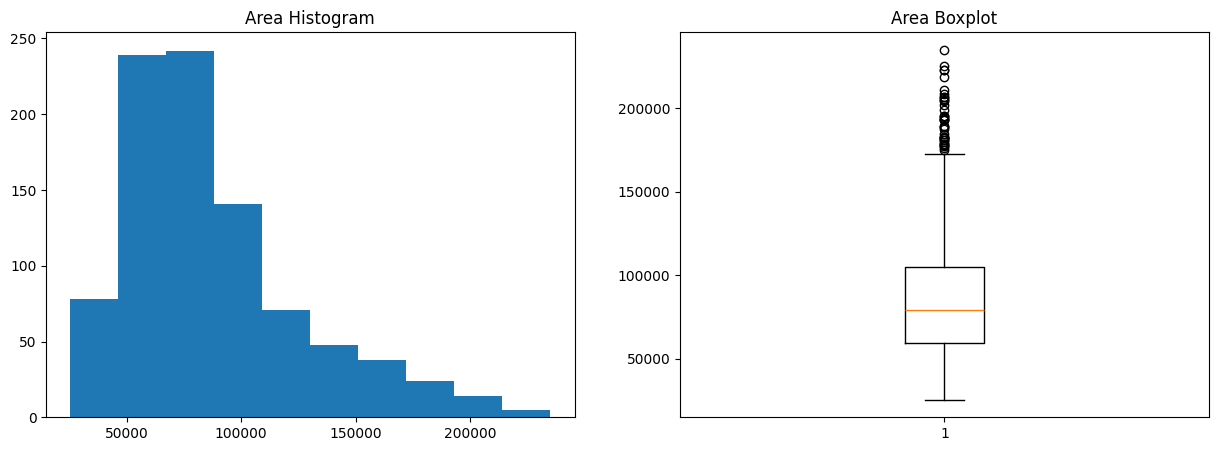

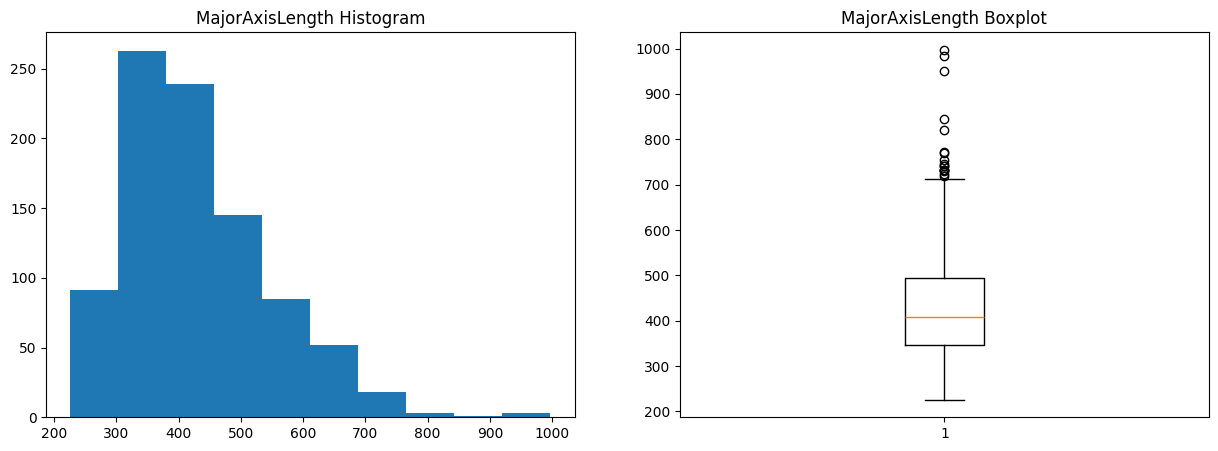

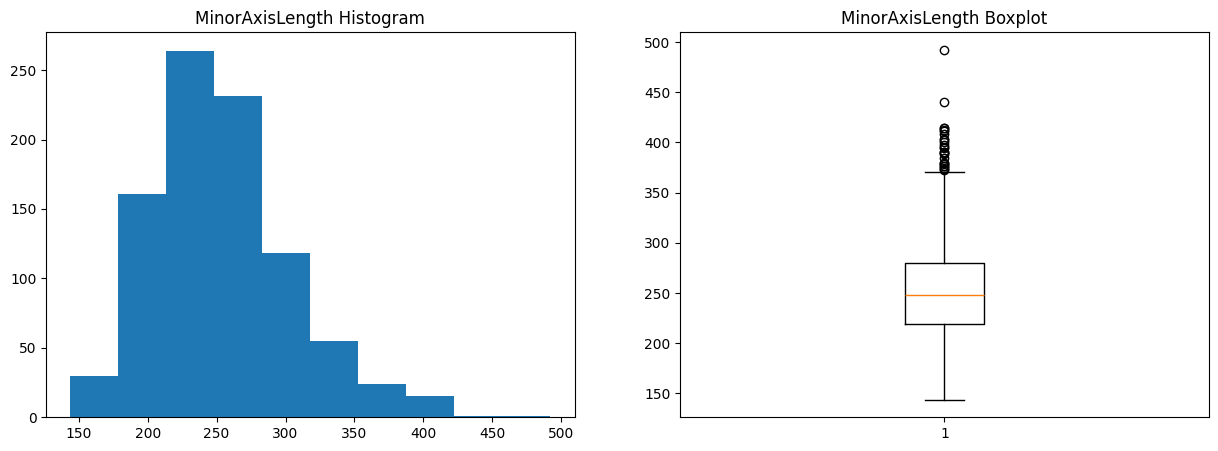

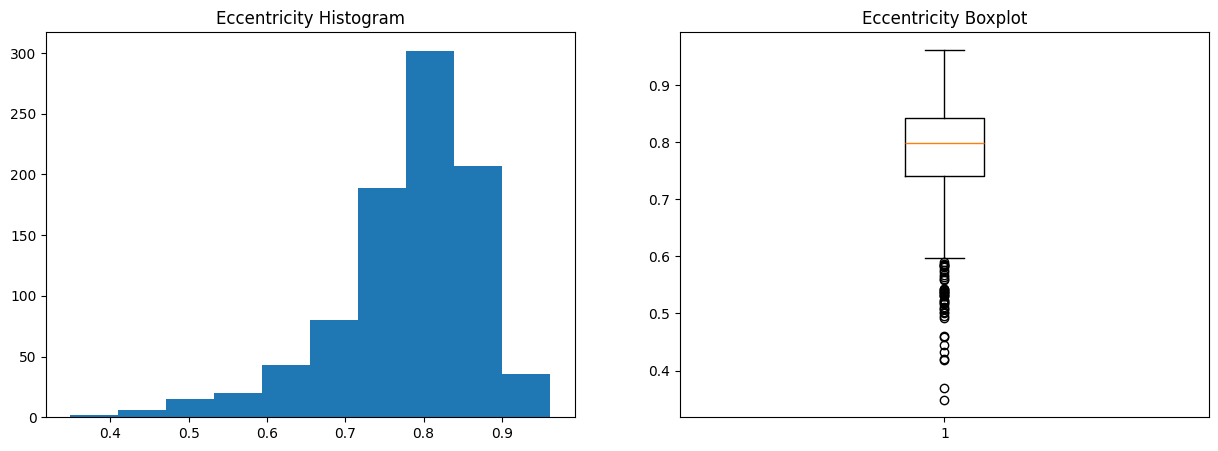

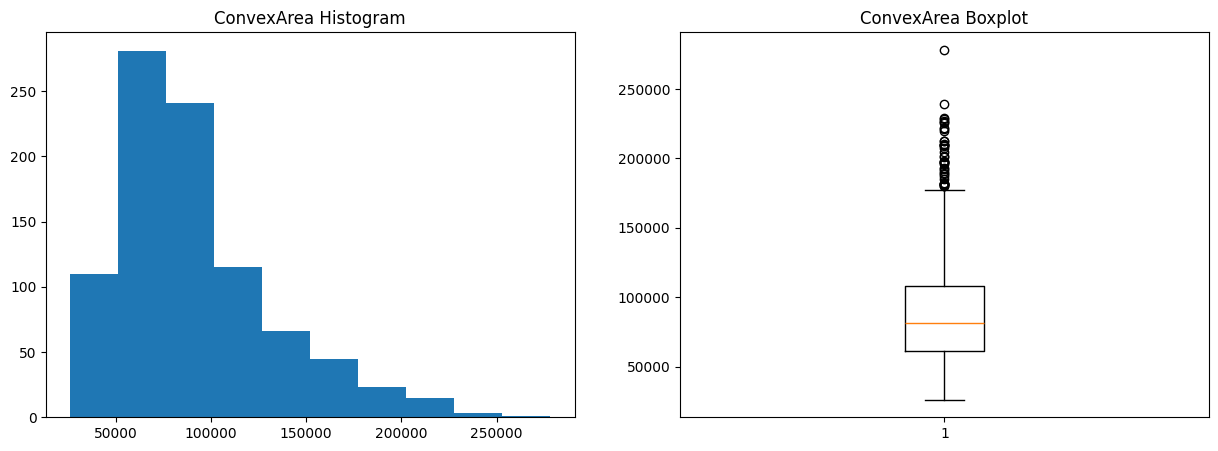

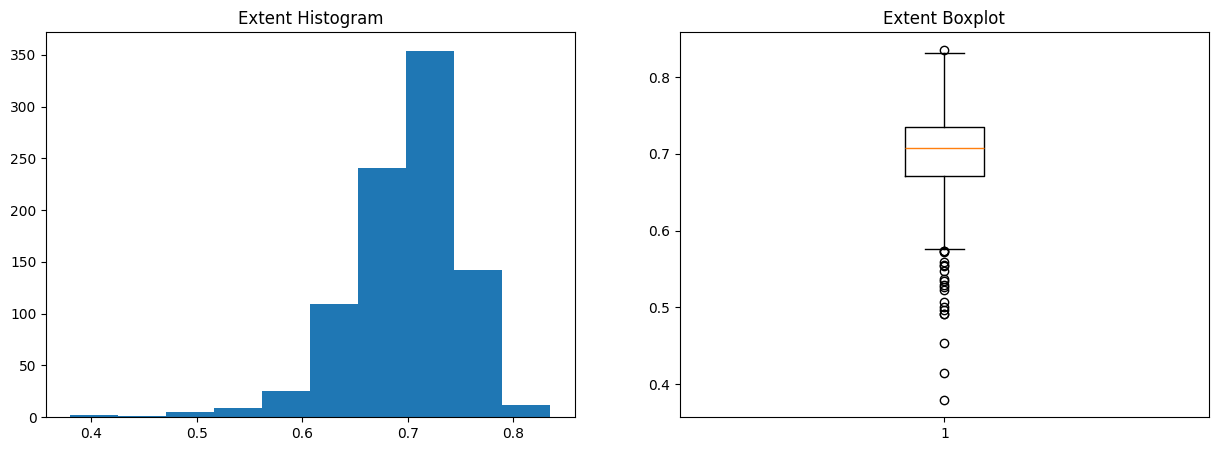

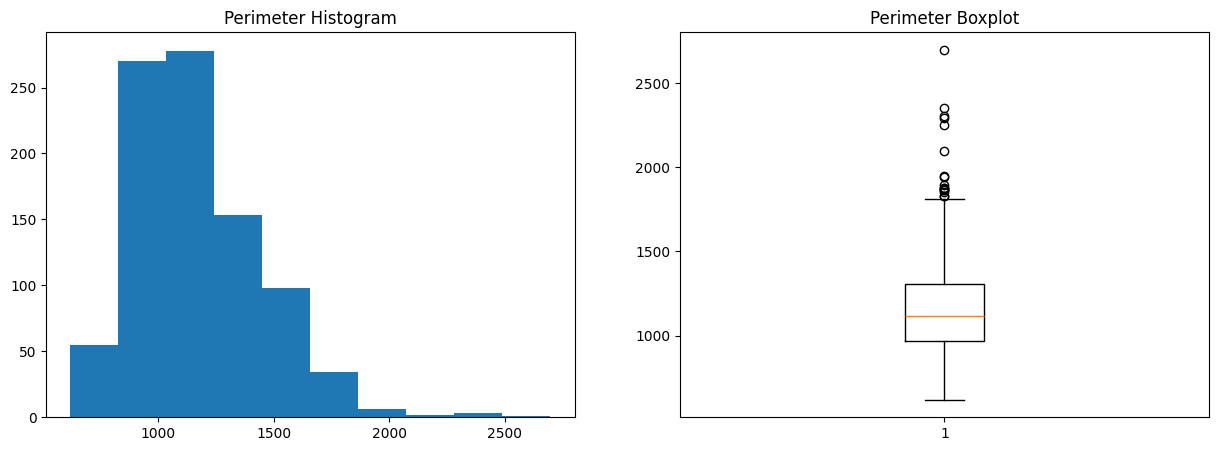

In [63]:
# Visualization
for n in range(N_FEATURES):
  create_plots(X[:,n],COLUMNS[n])

#### 2.1.1 Test Results

Outlier detection and skewness analysis were performed on all features using the `find_outlier_and_skew` function. The results are:

- **Area:** Outliers=41, Skew=1.173  
- **MajorAxisLength:** Outliers=17, Skew=0.988  
- **MinorAxisLength:** Outliers=26, Skew=0.799  
- **Eccentricity:** Outliers=43, Skew=-1.325  
- **ConvexArea:** Outliers=42, Skew=1.241  
- **Extent:** Outliers=21, Skew=-1.150  
- **Perimeter:** Outliers=17, Skew=1.016  

Histograms and boxplots were generated to visualize feature distributions.

**Analysis:**  
Several features have skewness and contain outliers, which could negatively affect model performance. While techniques such as log transformation or Box-Cox can be used to reduce skewness, they are limited to positive values. Since some features show negative skew, the **Yeo-Johnson transformation** (The mathematical details of Yeo-Johnson and scaling methods will be explained in later sections.) is can be applied, as it supports both positive and negative values. Features with pronounced skew or extreme values are suitable for **Robust Scaling**, which reduces outlier influence while preserving relative relationships. Features with moderate skew and few outliers can also be safely standardized.

**Scaling Strategy for Model Training:**  
Based on these analyses, **Yeo-Johnson transformation + Standard Scaling** and **Robust Scaling** are the primary candidates for preprocessing. **Min-Max Scaling** is less suitable due to the presence of outliers, which could compress the majority of data into a narrow range. For linear models like Perceptron, features with zero mean and unit variance generally improve convergence, making **standardization after Yeo-Johnson** potentially beneficial. During model training, **Grid Search** will be used to evaluate scaling strategies and hyperparameters to select the preprocessing method that yields the best performance.


#### Yeo-Johnson Transformation

The **Yeo-Johnson transformation** stabilizes variance and reduces skewness in data while supporting both positive and negative values. It generalizes the Box-Cox transformation to handle negative values.

For a feature x and a parameter 𝜆, the transformation is:

##### **Case 1: $x \ge 0$ (Non-Negative Values)**

$$
y =
\begin{cases}
\frac{(x + 1)^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\log(x + 1), & \text{if } \lambda = 0
\end{cases}
$$

##### **Case 2: $x < 0$ (Negative Values)**

$$
y =
\begin{cases}
-\frac{(-x + 1)^{2 - \lambda} - 1}{2 - \lambda}, & \text{if } \lambda \neq 2 \\
-\log(-x + 1), & \text{if } \lambda = 2
\end{cases}
$$

Here, 𝜆 is estimated from the data, usually via maximum likelihood, to make the transformed data as close to normal as possible.

**Reference:**  
Yeo, I.-K., & Johnson, R. A. (2000). A new family of power transformations to improve normality or symmetry. Biometrika, 87(4), 954–959. https://doi.org/10.1093/biomet/87.4.954

In [64]:
def yeo_johnson_standard_scaler_fit(data):
  """
  Fit Yeo-Johnson transformation and standard scaling to the dataset.

  Parameters
    data (np.ndarray): Numeric dataset where each column is a feature

  Returns
    data_scaled (np.ndarray): Transformed and standardized dataset
    params (dict): Dictionary containing lambda, mean, and std for each feature
  """
  data_scaled = data.copy().astype(float)
  params = {}

  for c in range(data.shape[1]):
    data_yj, lmbda = stats.yeojohnson(data[:, c]) # Calculate yeo johnson stats
    mean = np.mean(data_yj)
    std = np.std(data_yj) if np.std(data_yj) != 0 else 1
    data_scaled[:, c] = (data_yj - mean) / std

    params[c] = {"lambda": lmbda, "mean": mean, "std": std}

  return data_scaled, params


def yeo_johnson_standard_scaler_transform(data, params):
  """
  Apply previously fitted Yeo-Johnson transformation and standard scaling.

  Parameters
    data (np.ndarray): Numeric dataset where each column is a feature
    params (dict): Dictionary containing lambda, mean, and std for each feature

  Returns
    data_scaled (np.ndarray): Transformed and standardized dataset
  """
  data_scaled = data.copy().astype(float)

  for c in range(data.shape[1]):
    # Load parameters
    lmbda = params[c]["lambda"]
    mean = params[c]["mean"]
    std = params[c]["std"]
    data_yj = stats.yeojohnson(data[:, c], lmbda=lmbda)
    data_scaled[:, c] = (data_yj - mean) / std

  return data_scaled

In [65]:
def robust_scaler_fit(data):
  """
  Fit a Robust Scaler using median and IQR for each feature.

  Parameters
    data (np.ndarray): Numeric dataset where each column is a feature

  Returns
    data_scaled (np.ndarray): Scaled dataset
    params (dict): Dictionary containing median and IQR for each feature
  """
  data_scaled = data.copy().astype(float)
  n = data.shape[1]
  params = {}

  for c in range(n):
    col = data[:, c]
    # Find quartiles, IQR and median
    q1 = np.quantile(col, 0.25)
    q3 = np.quantile(col, 0.75)
    iqr = q3 - q1
    median = np.median(col)

    data_scaled[:, c] = (col - median) / (iqr if iqr != 0 else 1)
    params[c] = {"median": median, "iqr": iqr if iqr != 0 else 1}

  return data_scaled, params


def robust_scaler_transform(data, params):
  """
  Apply previously fitted Robust Scaler to the dataset.

  Parameters
    data (np.ndarray): Numeric dataset where each column is a feature
    params (dict): Dictionary containing median and IQR for each feature

  Returns
    data_scaled (np.ndarray): Scaled dataset
  """
  data_scaled = data.copy().astype(float)
  n = data.shape[1]

  for c in range(n):
    # Load params
    median = params[c]["median"]
    iqr = params[c]["iqr"]
    data_scaled[:, c] = (data[:, c] - median) / iqr

  return data_scaled


#### 2.2 Train-Test Split and Target Encoding

The dataset is split into **training** and **testing** sets, with 80% of the data used for training and 20% reserved for testing. This separation ensures that the model is evaluated on data it has not seen during training, providing a reliable estimate of generalization performance.  

The target variable y is also encoded as **1 for "Kecimen"** and **-1 for "Besni"**, converting it into a numerical format suitable for linear models such as Perceptron.

**Why use a validation/test set instead of training data?**  
Evaluating the model only on training data can give optimistic performance metrics, as the model may memorize the training examples. By using a separate validation or test set, we assess how well the model performs on unseen data.

**How evaluating on unseen data helps:**  
Testing on unseen data provides a measure of the model's **generalization capability**, indicating how it might perform on real-world data. It helps detect overfitting and guides model selection and hyperparameter tuning.


In [66]:
# Split the dataset into training and testing sets (80% train, 20% test)
y = y.flatten()
y = np.where(y == "Kecimen", 1, -1)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (675, 7)
Shape of X_test: (225, 7)
Shape of Y_train: (675,)
Shape of Y_test: (225,)


In [67]:
# 2 different data sets for Standard and Robust
X_train_scaled_standard, params = yeo_johnson_standard_scaler_fit(X_train)
X_test_scaled_standard = yeo_johnson_standard_scaler_transform(X_test, params)

X_train_scaled_robust, params = robust_scaler_fit(X_train)
X_test_scaled_robust = robust_scaler_transform(X_test, params)

In [68]:
print("Outlier and Skewness Test After Standard Scaling")
find_outlier_and_skew(X_train_scaled_standard, columns=COLUMNS)

print("\nOutlier and Skewness Test After Robust Scaling")
find_outlier_and_skew(X_train_scaled_robust, columns=COLUMNS)

Outlier and Skewness Test After Standard Scaling
Area: Outliers=2, Skew=0.013
MajorAxisLength: Outliers=0, Skew=0.022
MinorAxisLength: Outliers=5, Skew=0.001
Eccentricity: Outliers=2, Skew=-0.078
ConvexArea: Outliers=2, Skew=0.014
Extent: Outliers=8, Skew=0.026
Perimeter: Outliers=2, Skew=0.017

Outlier and Skewness Test After Robust Scaling
Area: Outliers=30, Skew=1.177
MajorAxisLength: Outliers=12, Skew=0.978
MinorAxisLength: Outliers=20, Skew=0.809
Eccentricity: Outliers=31, Skew=-1.334
ConvexArea: Outliers=31, Skew=1.207
Extent: Outliers=13, Skew=-1.179
Perimeter: Outliers=13, Skew=0.927


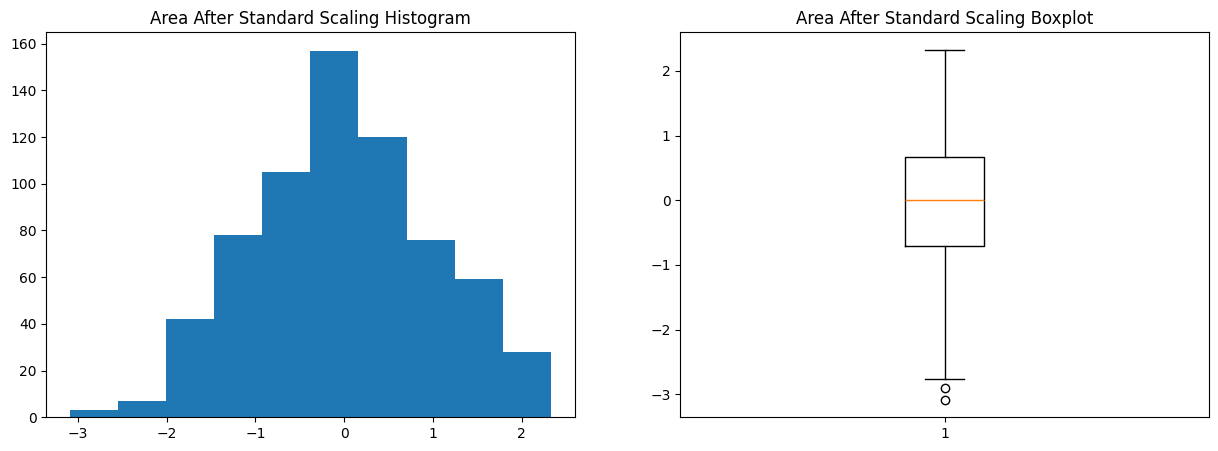

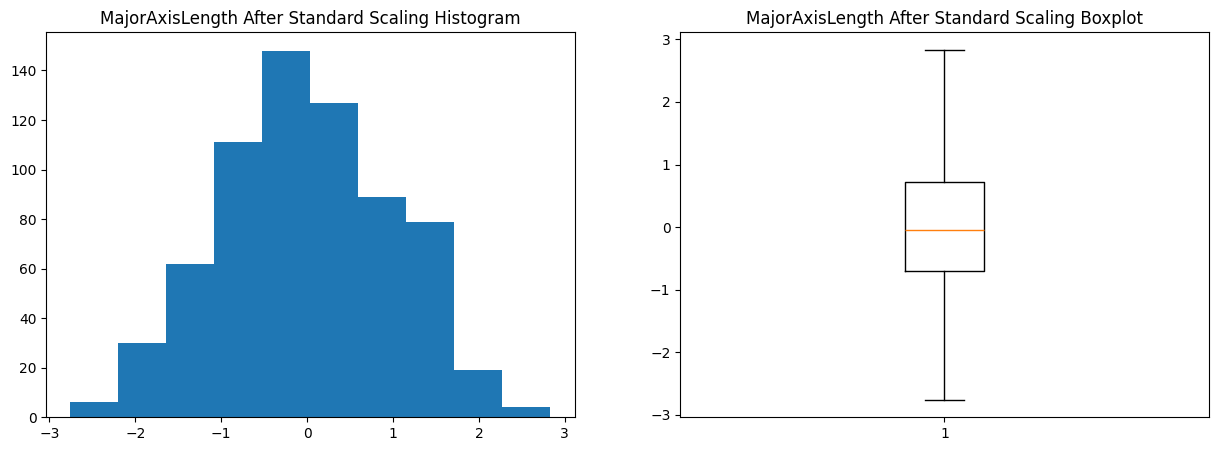

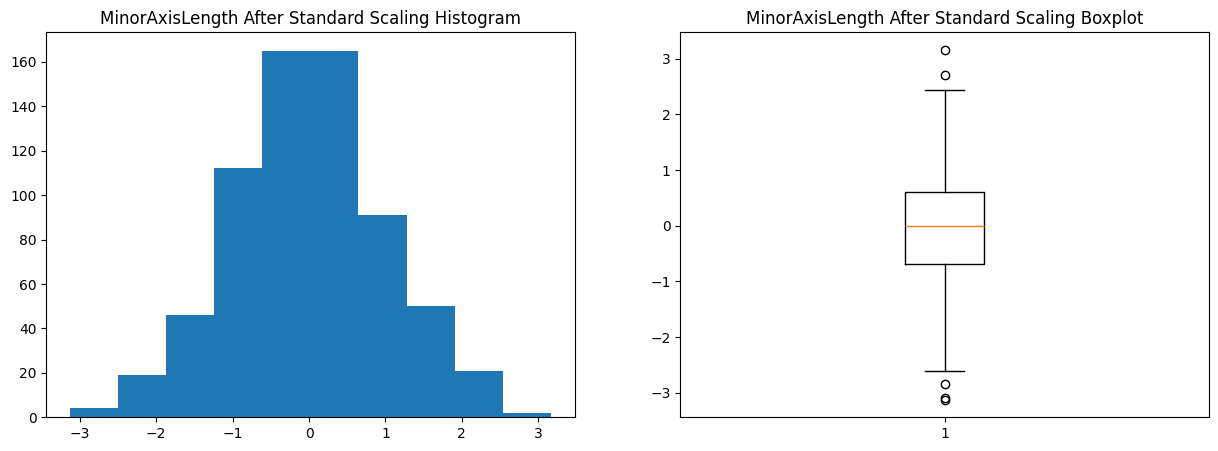

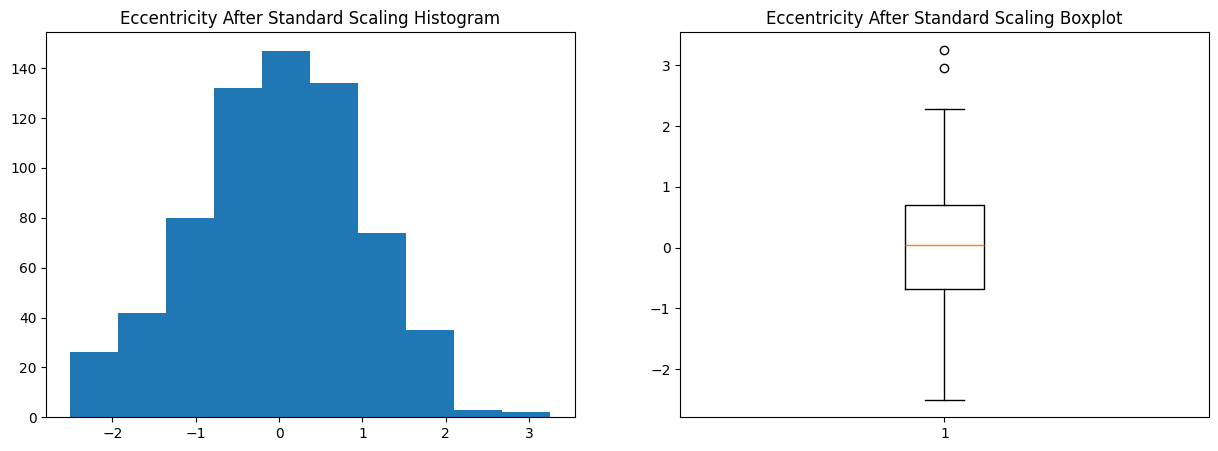

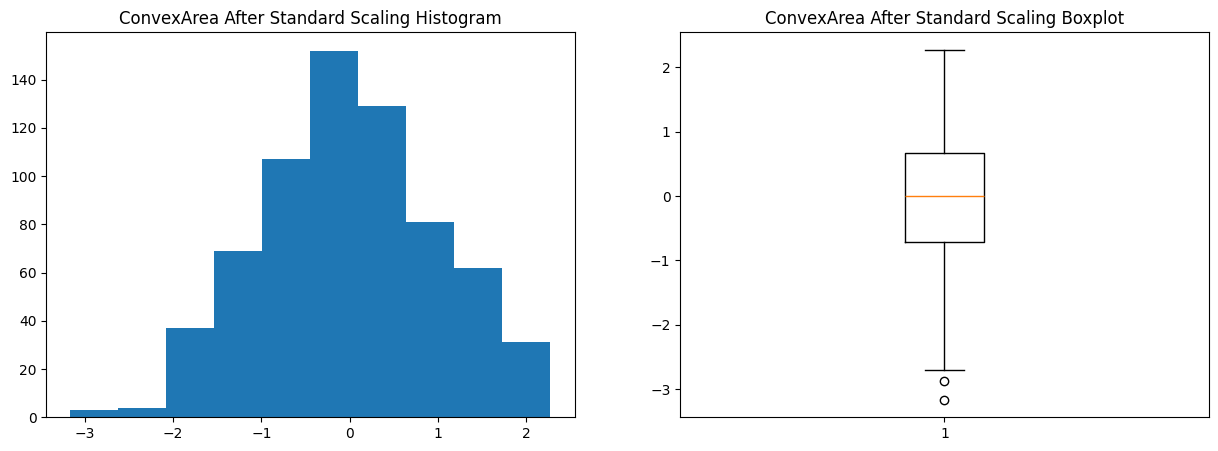

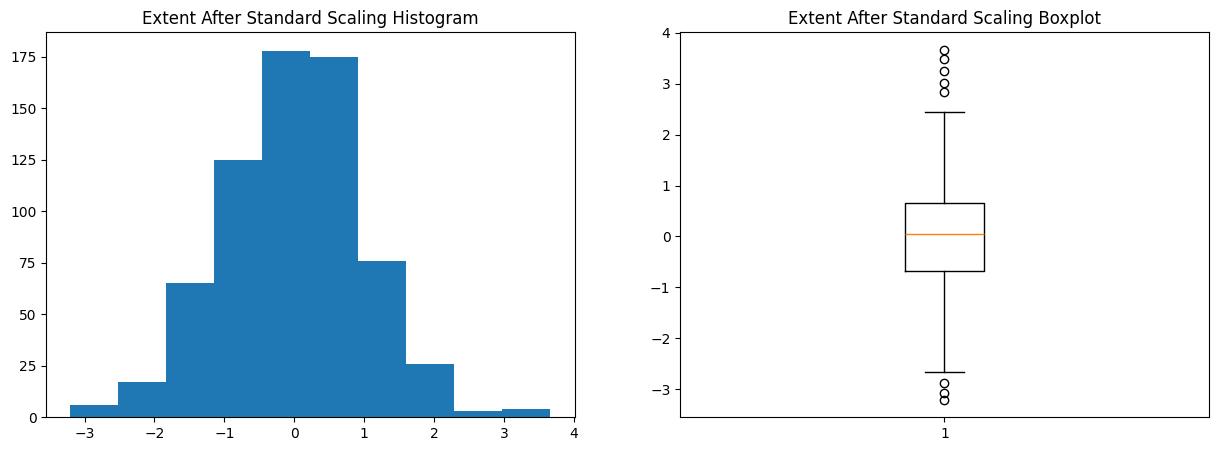

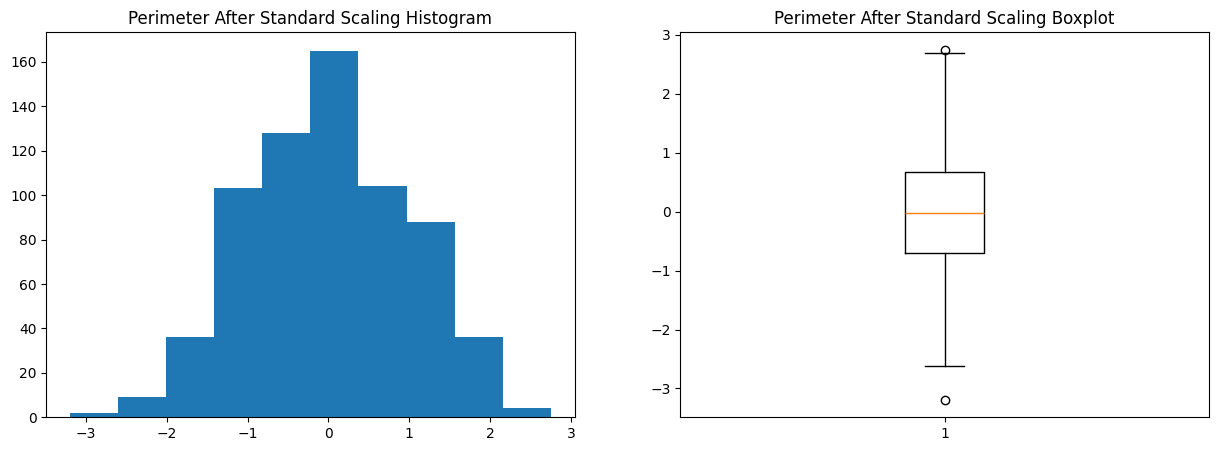

In [69]:
for c in range(N_FEATURES):
  create_plots(X_train_scaled_standard[:,c],COLUMNS[c] + " After Standard Scaling")

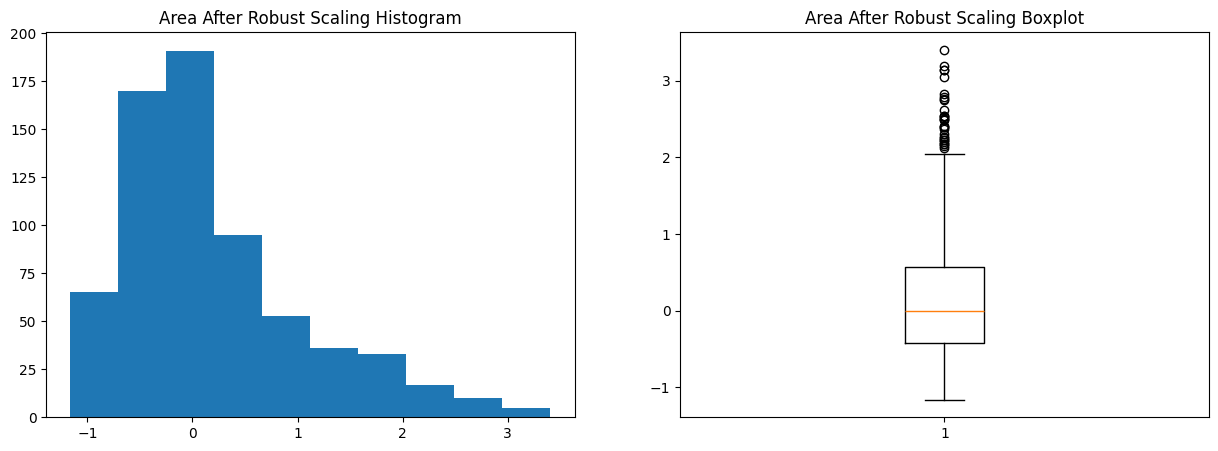

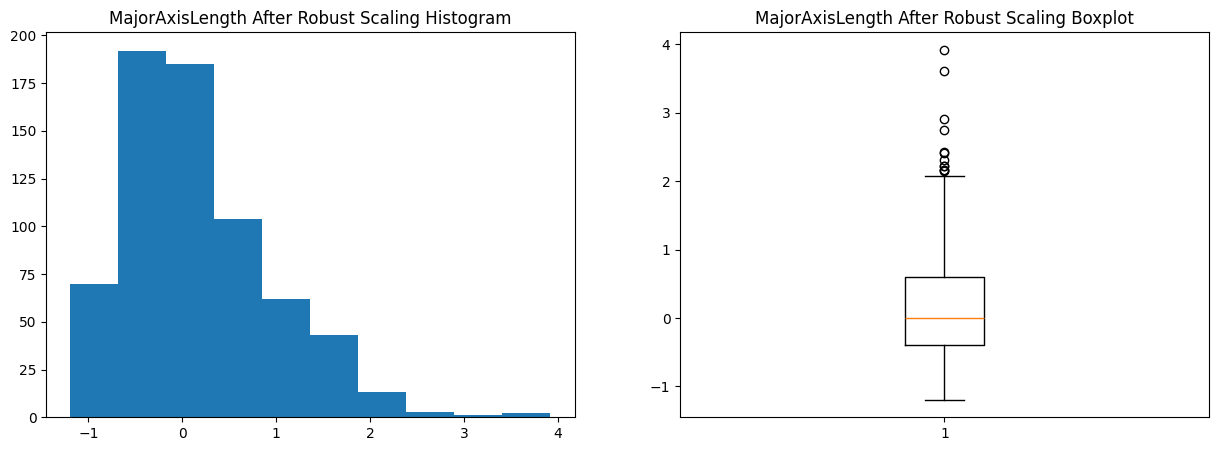

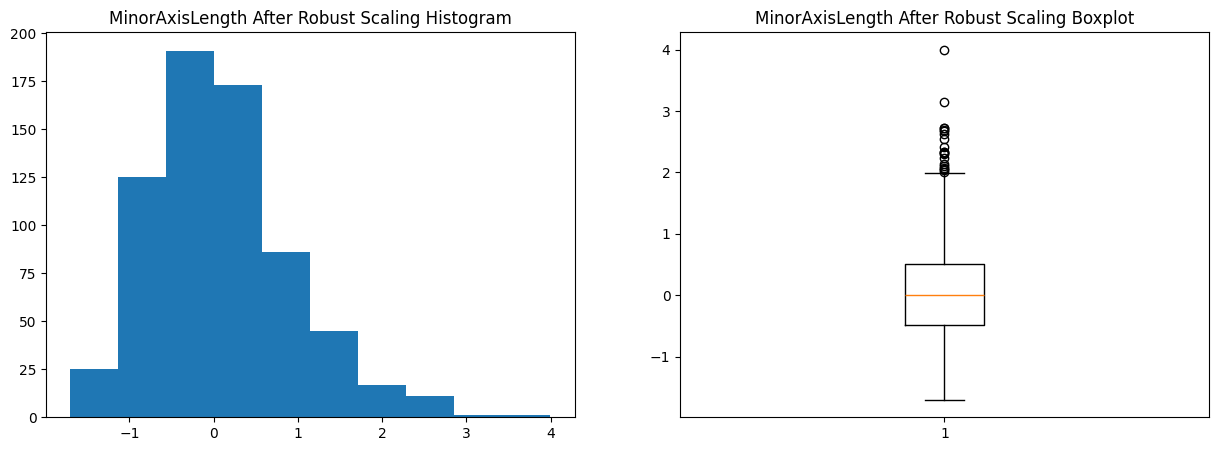

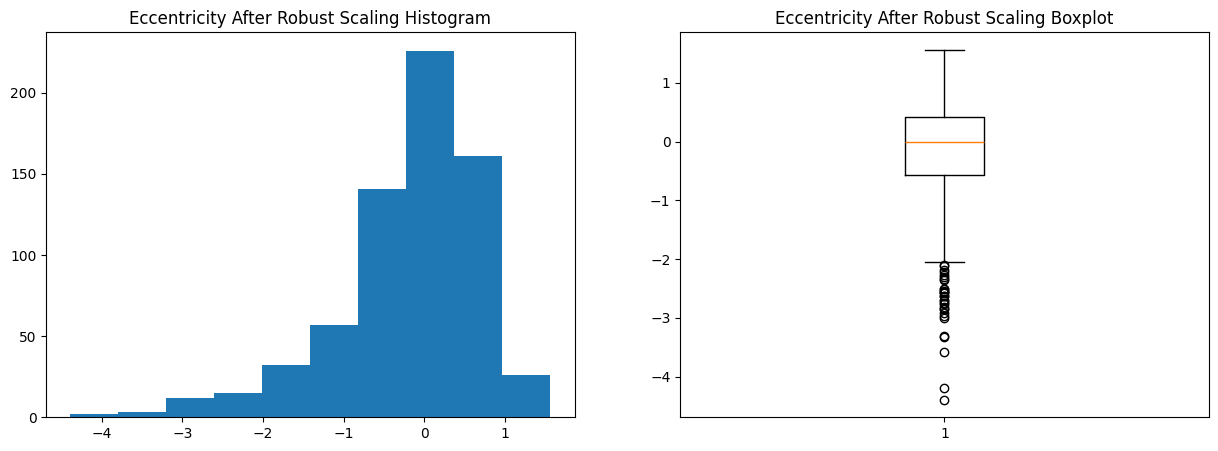

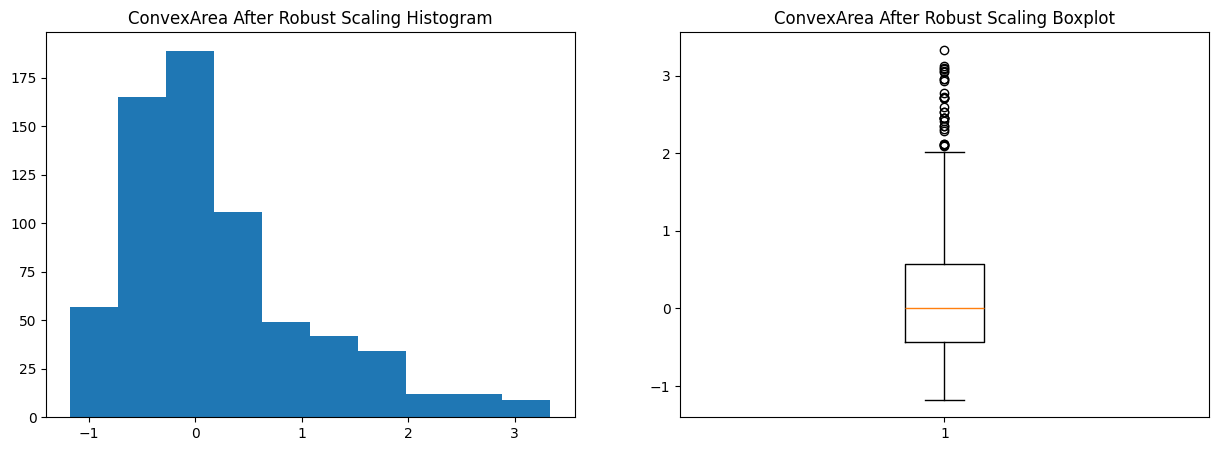

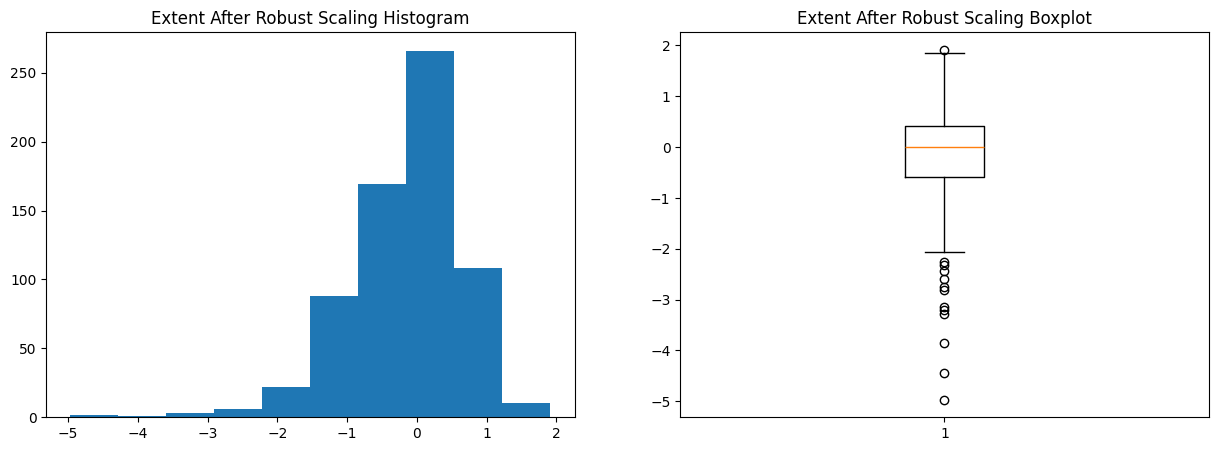

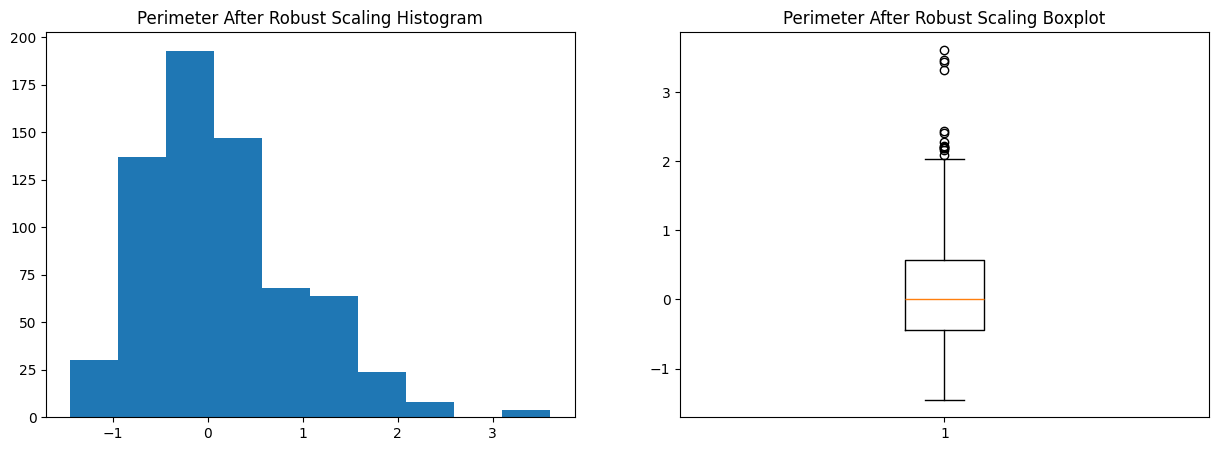

In [70]:
for c in range(N_FEATURES):
  create_plots(X_train_scaled_robust[:,c],COLUMNS[c] + " After Robust Scaling")

#### 2.4 Preprocessing Results

The dataset was split into 80% training and 20% testing to ensure that the model's performance is evaluated on unseen data, providing a reliable measure of generalization.

**Scaling:**  
Two preprocessing strategies were applied: Robust Scaling and Yeo-Johnson transformation followed by Standardization. The scaling parameters (median/IQR for Robust Scaling, lambda/mean/std for Yeo-Johnson + Standardization) were computed only on the training set and then applied to the test set. This avoids data leakage, ensuring that no information from the test data influences the training process.

**Outlier and Skewness Analysis:**  

- *Yeo-Johnson + Standardization:*  
  - Area: Outliers=2, Skew=0.013  
  - MajorAxisLength: Outliers=0, Skew=0.022  
  - MinorAxisLength: Outliers=5, Skew=0.001  
  - Eccentricity: Outliers=2, Skew=-0.078  
  - ConvexArea: Outliers=2, Skew=0.014  
  - Extent: Outliers=8, Skew=0.026  
  - Perimeter: Outliers=2, Skew=0.017  

- *Robust Scaling:*  
  - Area: Outliers=30, Skew=1.177  
  - MajorAxisLength: Outliers=12, Skew=0.978  
  - MinorAxisLength: Outliers=20, Skew=0.809  
  - Eccentricity: Outliers=31, Skew=-1.334  
  - ConvexArea: Outliers=31, Skew=1.207  
  - Extent: Outliers=13, Skew=-1.179  
  - Perimeter: Outliers=13, Skew=0.927  

**Analysis:**  
Robust Scaling reduces the influence of extreme values, while Yeo-Johnson transformation combined with Standardization effectively reduces skewness, particularly for features with both positive and negative values.  

The next step is to use **Grid Search** to determine which preprocessing method and hyperparameters yield the best model performance on the training set, ensuring optimal results when applied to unseen test data.


### 3. Implementing Perceptron for Binary Classification (20 points)

#### 3.1 Perceptron Application

The task is a binary classification problem, aiming to between two classes of raisins which called Kecimen and Besni. Each sample is represented by seven features, and the goal is to assign the correct class label to each raisin based on these attributes.

The Perceptron algorithm was applied because the dataset is linearly separable, meaning a single linear decision boundary can theoretically separate the two classes. The Perceptron is a linear classifier that iteratively adjusts its weights to reduce classification errors. For every misclassified sample, the algorithm updates the weights in the direction that would correct the mistake. This process continues until all samples are correctly classified or a predefined number of iterations is reached.

A linear model was chosen due to its simplicity, efficiency, and interpretability. It provides a clear hyperplane separating the classes and serves as a baseline to evaluate the necessity of more complex models. Proper preprocessing, such as feature scaling and skewness correction, ensures faster convergence and stable weight updates.

If the data were not linearly separable, the Perceptron would fail to converge because no linear hyperplane could perfectly separate the classes. The algorithm would continue updating weights indefinitely, resulting in poor performance. In such cases, alternative approaches like nonlinear transformations, or other classifiers would be required.

If the dataset contained more than two classes, the standard Perceptron algorithm would not be directly applicable, as it is inherently a binary classifier. In such a case, extensions like the one-vs-rest or one-vs-one strategies would need to be employed. These approaches decompose the multi-class problem into multiple binary classification tasks, allowing the Perceptron to handle each pair or each class against the rest. Without such adaptations, the algorithm would be unable to produce meaningful predictions, and performance would likely degrade significantly.


####  Implement Percepton Learning Algorithm

In [71]:
class Perceptron:
  """
  Perceptron class implements a simple linear classifier for binary classification.

  Parameters
    lr (float): Learning rate for weight updates
    n_iter (int): Maximum number of training iterations (epochs)
    bias (float): Initial bias term
    weight (np.ndarray or None): Initial weights for features
    random_state (int): Seed for reproducibility
    shuffle (bool): Whether to shuffle data each epoch
    random_start (bool): Initialize weights randomly if True
    verbose (bool): Print training logs if True

  Methods
    reset(): Reset weights and bias to initial state
    activation(x): Compute activation for input x, returns 1 or -1
    fit(x, y): Train the Perceptron on features x and labels y
    predict(x): Predict labels for input x
  """
  def __init__(self, lr = 0.001, n_iter = 1000, bias = 0, weight = None, random_state = 42, shuffle = False, random_start = False, verbose = False):
    self.lr = lr
    self.n_iter = n_iter
    self.bias = bias
    self.weight = weight

    self.shuffle = shuffle
    self.random_state = random_state
    self.random_start = random_start
    np.random.seed(self.random_state)

    self.verbose = verbose
    self.logs = []

    self.best_metric = 0
    self.best_params = {"weights":weight,"bias":bias}
    self.last_params = {"weights":weight,"bias":bias}

  def log(self, message, skip = False):
    """
    Logger function for events of model

    Paramters
      message (str): Log message
      skip (bool): Skip flag for verbose mode
    """
    self.logs.append(message)
    if self.verbose and not skip:
      tqdm.write(message)

  def reset(self):
    """
    Reset model's weight vector and bias
    """
    np.random.seed(self.random_state)
    self.bias = 0
    self.weight = None
    self.log("Weight and bias reset to 0 and None")

  def activation(self, x):
    """
    Standart step function for training
    """
    z = np.dot(self.weight,x) + self.bias
    return 1 if z >= 0 else -1

  def fit(self, x, y):
    """
    Train the Perceptron on features x and labels y

    Parameters
      x (np.ndarray): Training samples for model
      y (np.ndarray): Labels for tranin data
    """
    self.log("Training procces is started")

    n_samples, n_feature = x.shape

    # Assign start values for weight and bias
    if self.random_start == True:
      self.weight = np.random.randn(n_feature) * 0.01
      self.bias = np.random.randn() * 0.01
    elif self.weight is None:
      self.weight = np.zeros(n_feature)
      self.bias = 0

      self.log(f"Weight and bias assign to {self.weight} and {self.bias}")

    # Start train
    pbar = tqdm(range(self.n_iter), desc="Training",leave=True, dynamic_ncols=True) if self.verbose else range(self.n_iter)
    for epoch in pbar:
      # Shuffle data
      if self.shuffle:
        idxs = np.arange(n_samples)
        np.random.shuffle(idxs)
        x, y = x[idxs], y[idxs]

      errors = 0
      for idx, attr in enumerate(x):
        predict = self.activation(attr)
        if predict != y[idx]: # Update for errors
          errors +=1
          self.weight = self.weight + self.lr * y[idx] * attr
          self.bias = self.bias + self.lr * y[idx]

      # Save last parameters
      self.last_params = {"weights":self.weight.copy(),"bias":self.bias}

      y_pred_train = self.predict(x)
      epoch_acc = accuracy_score(y,y_pred_train)
      if self.verbose:
        pbar.set_postfix(epoch=epoch+1, last_accuracy=f"{epoch_acc:.4f}",best_accuracy=f"{self.best_metric:.4f}")

      # Save best parameters
      if epoch_acc > self.best_metric:
        self.best_metric = epoch_acc
        self.best_params = {"weights":self.weight.copy(),"bias":self.bias}
        self.log(f"New best epoch found. Epoch {epoch+1} finished. Accuracy: {epoch_acc:.3f}",True)

      if errors == 0:
        self.log(f"Converged at epoch {epoch} n_iter {self.n_iter}",True)
        break

    # Rollback for best parameters at the end of training
    self.weight = self.best_params["weights"]
    self.bias = self.best_params["bias"]

  def predict(self, x):
    """
    Predict labels for input x

    Parameters
      x (ndarray): Samples for prediction

    Return
      predicts (list): List of predictions
    """
    predicts = []
    for attr in x:
      predict = self.activation(attr)
      predicts.append(predict)
    return predicts

In this perceptron model used during development, unlike the normal one, the best weights were stored until the end of the model and reloaded at the end. This was to prevent the model from converging to a lower point as a result of further processing, resulting in lower scores.

#### 3.1.1 Perceptron Model Parameters

The perceptron model uses several key parameters that control its learning behavior and performance.

**Weights**

* **Description:** A vector of coefficients assigned to each input feature.
* **Role:** Determines how much each feature contributes to the prediction.
* **Importance:** Correct initialization and iterative updates of weights are essential for learning the proper decision boundary.

**Bias**

* **Description:** A scalar added to the weighted sum of inputs before the activation function.
* **Role:** Shifts the decision boundary away from the origin.
* **Importance:** Without bias, the model may fail to classify data that is not centered at the origin.

**Learning Rate (`lr`)**

* **Description:** A small positive value that scales weight updates during training.
* **Role:** Controls the magnitude of adjustments to weights after each misclassified sample.
* **Importance:** A learning rate too large may overshoot optimal weights, while too small may slow convergence.

**Number of Iterations (`n_iter`)**

* **Description:** Maximum number of epochs.
* **Role:** Limits training duration while giving the model opportunities to converge.
* **Importance:** Prevents infinite loops for linearly separable data and ensures sufficient training.

**Random State (`random_state`)**

* **Description:** Seed for random number generation used in shuffling and weight initialization.
* **Role:** Ensures reproducibility of experiments.
* **Importance:** Enables consistent results across runs.

**Shuffle**

* **Description:** Boolean flag to shuffle the training data each epoch.
* **Role:** Presents data in different orders to avoid learning cycles.
* **Importance:** Can improve convergence speed and generalization.

**Random Start (`random_start`)**

* **Description:** Boolean flag to initialize weights and bias randomly small numbers instead of zeros.
* **Role:** Provides variability in starting points for optimization.
* **Importance:** Can help avoid symmetric or degenerate solutions during learning.

**Verbose**

* **Description:** Boolean flag to display training progress and logs.
* **Role:** Shows epoch updates, accuracy, and convergence information.
* **Importance:** Useful for monitoring learning and debugging the training process.


#### 3.1.2 Effect of Learning Rate and Number of Epochs on Training

The **learning rate** and **number of epochs** are two of the most influential hyperparameters in the perceptron’s training process. They directly control how fast and how long the model learns. Epoch indicates the number of steps the model will be trained for, so the correct value should be chosen to avoid training that is too long or too short. Learning rate is the step size used when optimizing the model's weights, so higher values ​​trigger aggressive changes, while lower values ​​trigger small changes at each step.

**Learning Rate**
* **Very Small Learning Rate:**
  * The perceptron updates its weights very slowly.
  * Convergence takes longer, and the model may need many epochs to find a good decision boundary.
  * Sometimes, it can get stuck in local plateaus and never reach convergence within the given epochs.

* **Very Large Learning Rate:**
  * The weight updates are too aggressive.
  * The model may overshoot the optimal solution and oscillate around it.
  * Training can become unstable, and accuracy may fluctuate instead of improving.

**Number of Epochs**
* **Too Few Epochs:**
  * The model might stop before convergence.
  * Weights remain suboptimal, resulting in underfitting and poor accuracy.

* **Too Many Epochs:**
  * The perceptron may continue updating even after achieving good separation.
  * For linearly separable data, it wastes computation without improving performance.
  * On noisy or non-separable data, excessive training may cause oscillation and overfitting to noise.

#### 3.1.3 Accuracy implementation

In [72]:
def accuracy_score(y_true, y_pred):
  """
  Calculate the classification accuracy.

  Parameters
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels

  Returns
    float: Proportion of correctly predicted samples
  """
  y_true = np.array(y_true).flatten()
  y_pred = np.array(y_pred).flatten()

  return np.sum(y_true == y_pred) / len(y_true)


#### 3.1.4 Train the Perceptron

In [73]:
## We will initially train the model with predetermined parameters and then apply Grid Search to find the most accurate parameters.
model = Perceptron(n_iter = 1000,lr = 0.01,random_state = 42,shuffle=True,random_start=True,verbose=True)
model.fit(X_train_scaled_standard, y_train)

Training procces is started


Training: 100%|██████████| 1000/1000 [00:06<00:00, 143.40it/s, best_accuracy=0.8844, epoch=1000, last_accuracy=0.8652]


#### 3.1.5 Prediction on Training Data

In [74]:
# Predicting on the training data
y_pred_train = model.predict(X_train_scaled_standard)
accuracy_train = accuracy_score(y_train,y_pred_train)

print(f"Training Accuracy: {accuracy_train:.3f}")

Training Accuracy: 0.884


#### 3.1.6 Model Performance Evaluation

1. **What does accuracy tell us about the performance of the model?**
   Accuracy indicates the proportion of predictions that are correct out of all predictions. It shows how often the model predicts the correct class overall.

2. **Why is accuracy sometimes not enough, especially in cases where the data is imbalanced? Explain a scenario where a high accuracy might be misleading.**
   When one class dominates the dataset. For example, if 99% of data belongs to class A, a model that always predicts class A will achieve 99% accuracy but completely fail to detect class B instances.

3. **In what types of problems is precision more important than recall?**
   Precision is more important when false positives are costly. For instance, in spam detection, labeling a legitimate email as spam is worse than missing a few spam emails.

4. **In what cases is recall more critical?**
   Recall is critical when false negatives are costly. For example, in detecting a serious disease, failing to identify a patient with the disease can have severe consequences.

5. **When is the F1 score a better measure than accuracy? What are the limitations of using F1 score alone?**
   F1 score is better when the dataset is imbalanced because it balances precision and recall. Its limitation is that it weighs precision and recall equally, which may not reflect the true cost of errors in certain applications.


#### 3.1.7 Hyperparameter Optimization with Grid Search

Grid Search is used to systematically evaluate combinations of hyperparameters to identify the set that achieves the best model performance. For the Perceptron model, hyperparameters such as learning rate, number of iterations, and shuffle settings can significantly affect convergence and accuracy.

In this study, a **3-fold cross-validation** strategy was additionally applied during the grid search process to obtain a more reliable estimation of model performance. Normally, each hyperparameter combination would be trained and tested multiple times on different data splits, but this can be computationally expensive. By intuitively choosing **3 folds**, the cross-validation process was kept computationally manageable while still providing meaningful insight into generalization performance.

Each fold alternates between serving as the validation set and part of the training set, allowing the model to be evaluated on all data points without an excessive increase in training time. This is particularly reasonable in the case of linearly separable datasets, where the Perceptron is guaranteed to converge given a sufficient number of epochs and an appropriate learning rate. Thus, 3-fold validation offers a balanced trade-off between computational efficiency and performance reliability.

By applying Grid Search with this 3-fold scheme, each combination of parameters is tested systematically, and the resulting performance metrics are recorded. This allows us to determine:

* Which hyperparameters allow the Perceptron to converge.
* The maximum achievable performance given the dataset and model constraints.
* Which settings fail to converge or underperform, providing insights for model tuning.

This systematic approach ensures that the chosen hyperparameters are optimal for training, leading to improved generalization on unseen data.

**References:**
Belete, D. M., & Huchaiah, M. D. (2021). Grid search in hyperparameter optimization of machine learning models for prediction of HIV/AIDS test results. *International Journal of Computers and Applications.* [https://doi.org/10.1080/1206212X.2021.1974663](https://doi.org/10.1080/1206212X.2021.1974663)


In [75]:
lr_list = [0.001, 0.01, 0.1]  # Learning rates to try
n_iter_list = [10, 100, 1000]  # Number of epochs to try
shuffle_list = [False, True]  # Shuffle data each epoch
random_list = [False, True]  # Random start for weights
datasets = {"Robust": (X_train_scaled_robust, X_test_scaled_robust),
            "Standard": (X_train_scaled_standard, X_test_scaled_standard)}  # Dataset variants
parts = np.linspace(0,len(X_train),4).astype(int) # K-fold parts

param_grid = list(itertools.product(lr_list, n_iter_list, shuffle_list, random_list, datasets.keys()))  # All combinations

results = []  # Store results

for lr, n_iter, shuffle, random, dataset in param_grid:
  fold_accuracies = []

  # Start folds
  for i in range(3):
    val_idx = np.arange(parts[i], parts[i+1])
    train_idx = np.setdiff1d(np.arange(len(X_train)), val_idx)

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # Scaling for new data sets
    if dataset == "Standard":
      X_tr, params = yeo_johnson_standard_scaler_fit(X_tr)
      X_val = yeo_johnson_standard_scaler_transform(X_val, params)

    elif dataset == "Robust":
      X_tr, params = robust_scaler_fit(X_tr)
      X_val = robust_scaler_transform(X_val, params)

    # Train model
    model = Perceptron(lr=lr,
                      n_iter=n_iter,
                      shuffle=shuffle,
                      random_state=42,
                      random_start=random)
    model.reset()
    model.fit(X_tr, y_tr)

    # Predict training labels
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    fold_accuracies.append(acc)

  mean_acc = np.mean(fold_accuracies)

  results.append({'lr': lr,
                  'n_iter': n_iter,
                  'shuffle': shuffle,
                  'random': random,
                  'accuracy': mean_acc,
                  'scaler': dataset})  # Save combination results

  print(f"lr={lr}, n_iter={n_iter}, shuffle={shuffle}, random={random}, "
        f"scaler={dataset} → Mean Accuracy for 3-Fold={mean_acc:.3f}")

# Find best result
best = max(results, key=lambda x: x['accuracy'])
print(f"\nBest Hyperparameters: {best}")

lr=0.001, n_iter=10, shuffle=False, random=False, scaler=Robust → Mean Accuracy for 3-Fold=0.833
lr=0.001, n_iter=10, shuffle=False, random=False, scaler=Standard → Mean Accuracy for 3-Fold=0.846
lr=0.001, n_iter=10, shuffle=False, random=True, scaler=Robust → Mean Accuracy for 3-Fold=0.836
lr=0.001, n_iter=10, shuffle=False, random=True, scaler=Standard → Mean Accuracy for 3-Fold=0.852
lr=0.001, n_iter=10, shuffle=True, random=False, scaler=Robust → Mean Accuracy for 3-Fold=0.867
lr=0.001, n_iter=10, shuffle=True, random=False, scaler=Standard → Mean Accuracy for 3-Fold=0.858
lr=0.001, n_iter=10, shuffle=True, random=True, scaler=Robust → Mean Accuracy for 3-Fold=0.844
lr=0.001, n_iter=10, shuffle=True, random=True, scaler=Standard → Mean Accuracy for 3-Fold=0.865
lr=0.001, n_iter=100, shuffle=False, random=False, scaler=Robust → Mean Accuracy for 3-Fold=0.864
lr=0.001, n_iter=100, shuffle=False, random=False, scaler=Standard → Mean Accuracy for 3-Fold=0.862
lr=0.001, n_iter=100, shuf

In [76]:
# Train model with best hiperparameters and dataset combination
X_train_scaled, X_test_scaled = datasets[best["scaler"]]
model = Perceptron(lr=best["lr"],
                   n_iter=best["n_iter"],
                   shuffle=best["shuffle"],
                   random_start=best["random"],
                   random_state=42,
                   verbose = True)
model.reset()
model.fit(X_train_scaled, y_train)

Weight and bias reset to 0 and None
Training procces is started


Training: 100%|██████████| 1000/1000 [00:07<00:00, 140.78it/s, best_accuracy=0.8726, epoch=1000, last_accuracy=0.8652]


#### 3.2 Results

The best-performing configuration used a learning rate of 0.001, 1000 iterations, no shuffling, random weight initialization, and the Standard scaler, achieving an average 3-fold validation accuracy of 0.879. Across multiple trials, the Standard scaler consistently outperformed the Robust scaler by about 1–2 percentage points, likely due to its better handling of normally distributed features in this dataset.

Random weight initialization generally produced higher accuracies than zero initialization, as it helped the model escape symmetric or flat regions in the loss surface, leading to more effective convergence. The shuffle  parameter showed mixed effects. In some runs it improved learning stability, while in others it caused minor fluctuations. One contributing factor is that the best-performing weights were retained in memory toward the end of training, slightly amplifying the performance gap between configurations. Overall, this configuration offered the most stable and generalizable pattern. However, despite the improvements made, a full converge result could not be achieved.


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [77]:
def confusion_matrix(y_true, y_pred):
  """
  Compute and plot the confusion matrix for binary classification.

  Parameters
      y_true (array-like): True labels (1 and -1)
      y_pred (array-like): Predicted labels (1 and -1)
  """

  y_true = np.array(y_true).flatten()
  y_pred = np.array(y_pred).flatten()

  # Find true positive, true negative, false positive and false negative counts
  tp = np.sum((y_true == 1) & (y_pred == 1))
  tn = np.sum((y_true == -1) & (y_pred == -1))
  fp = np.sum((y_true == -1) & (y_pred == 1))
  fn = np.sum((y_true == 1) & (y_pred == -1))

  # Create matrix
  cm = np.array([[tn, fp],
                  [fn, tp]])

  plt.imshow(cm, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("Actual Labels")

  classes = ["Kecimen","Besni"]
  plt.xticks([0, 1], classes)
  plt.yticks([0, 1], classes)

  for i in range(2):
    for j in range(2):
      plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=12)

  plt.colorbar()
  plt.show()


In [78]:
def precision_score(y_true, y_pred):
  """
  Compute the precision for binary classification.

  Parameters
    y_true (array-like): True labels (1 and -1)
    y_pred (array-like): Predicted labels (1 and -1)

  Returns
    float: Precision score
  """
  y_true = np.array(y_true).flatten()
  y_pred = np.array(y_pred).flatten()

  tp = np.sum((y_true == 1) & (y_pred == 1))
  fp = np.sum((y_true == -1) & (y_pred == 1))

  return tp / (tp + fp) if (tp + fp) != 0 else 0.0


def recall_score(y_true, y_pred):
  """
  Compute the recall for binary classification.

  Parameters
    y_true (array-like): True labels (1 and -1)
    y_pred (array-like): Predicted labels (1 and -1)

  Returns
    float: Recall score
  """
  y_true = np.array(y_true).flatten()
  y_pred = np.array(y_pred).flatten()

  tp = np.sum((y_true == 1) & (y_pred == 1))
  fn = np.sum((y_true == 1) & (y_pred == -1))

  return tp / (tp + fn) if (tp + fn) != 0 else 0.0


def f1_score(y_true, y_pred):
  """
  Compute the F1 score for binary classification.

  Parameters
    y_true (array-like): True labels (1 and -1)
    y_pred (array-like): Predicted labels (1 and -1)

  Returns
    float: F1 score
  """
  p = precision_score(y_true, y_pred)
  r = recall_score(y_true, y_pred)
  return 2 * p * r / (p + r) if (p + r) != 0 else 0.0


def calculate_metrics(y_true, y_pred):
  """
  Compute Accuracy, Precision, Recall, and F1 score for binary classification.

  Parameters
    y_true (array-like): True labels (1 and -1)
    y_pred (array-like): Predicted labels (1 and -1)

  Returns
    tuple: (accuracy, precision, recall, f1)
  """
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return accuracy, precision, recall, f1


In [79]:
def classification_report(y_true, y_pred):
  """
  Generate a classification report showing Accuracy, Precision, Recall, F1 Score, and Support per class.

  Parameters
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels
  """
  y_true = np.array(y_true).flatten()
  y_pred = np.array(y_pred).flatten()

  print("Classification report:")
  print("-" * 50)
  print(f"{'Class':<10}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}")
  names = ["Besni","Kecimen"]
  idx = [-1,1]
  for names, cls in zip(names,idx):
    # Find true and predicted labels
    y_true_cls = np.where(y_true == cls, 1, -1)
    y_pred_cls = np.where(y_pred == cls, 1, -1)

    # Calculate metrics
    precision = precision_score(y_true_cls, y_pred_cls)
    recall = recall_score(y_true_cls, y_pred_cls)
    f1 = f1_score(y_true_cls, y_pred_cls)
    support = np.sum(y_true_cls == 1)

    print(f"{str(names):<10}{precision:<10.3f}{recall:<10.3f}{f1:<10.3f}{support:<10}")

  overall_acc = accuracy_score(y_true, y_pred)
  print("-" * 50)

Testing Accuracy: 0.8577777777777778

Classification report:
--------------------------------------------------
Class     Precision Recall    F1-Score  Support   
Besni     0.841     0.857     0.849     105       
Kecimen   0.873     0.858     0.866     120       
--------------------------------------------------



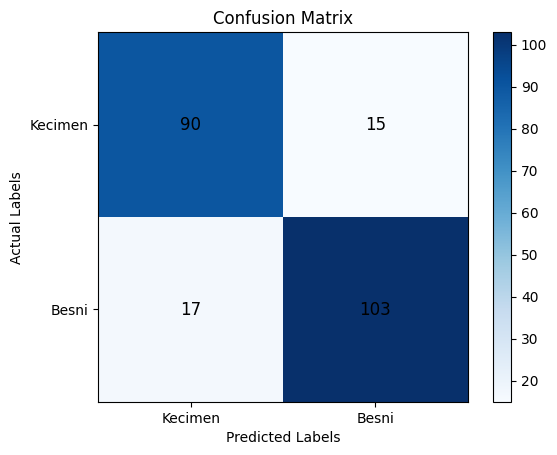

In [80]:
## Evaluate the model's performance on the test set by calculating accuracy. Print classification report and confusion matrix
y_pred_test = model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test,y_pred_test)

print("Testing Accuracy:", accuracy_test)
print()
classification_report(y_test,y_pred_test)
print()
confusion_matrix(y_test,y_pred_test)

Answer the Guiding Questions:
1. **What does accuracy tell us about the performance of the model?** Accuracy measures the proportion of correct predictions out of all predictions made by the model. It gives a general idea of how often the model predicts correctly, but it does not differentiate between types of errors or account for class imbalances. In our test results we can see our model handle most of our inputs. However, some misclassifications indicate that the model has not fully converged. This can be because of to the dataset not being perfectly linearly separable (in this case we know our set is linearly separable) or non ideal hyperparameter choices. With further tuning or feature transformation, convergence could likely improve.  

2. **Why is accuracy sometimes not enough, especially in cases where the data is imbalanced?**
When the dataset is imbalanced accuracy can be misleading because the model could predict the majority class most of the time and still achieve a high accuracy. If 99% of samples belong to class A and 1% to class B, a model that always predicts class A would achieve 99% accuracy but completely fail to identify any class B instances. In such cases, precision, recall, and F1-score are more informative metrics.

In [81]:
# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)
accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_test.flatten(), y_pred_test)

print("Train Results")
print("---")
print(f"Training Accuracy: {accuracy_train:.3f}")
print(f"Training Precision: {precision_train:.3f}")
print(f"Training Recall: {recall_train:.3f}")
print(f"Training F1 Score: {f1_train:.3f}")
print("\nTest Results")
print("---")
print(f"Testing Accuracy: {accuracy_test:.3f}")
print(f"Testing Precision: {precision_test:.3f}")
print(f"Testing Recall: {recall_test:.3f}")
print(f"Testing F1 Score: {f1_test:.3f}")

Train Results
---
Training Accuracy: 0.884
Training Precision: 0.842
Training Recall: 0.939
Training F1 Score: 0.888

Test Results
---
Testing Accuracy: 0.858
Testing Precision: 0.873
Testing Recall: 0.858
Testing F1 Score: 0.866


### Classification Report Analysis
   
1. **Accuracy**

   * **Value:** 0.858 (Test), 0.884 (Train)
   * **What this value represents:** Accuracy measures the overall proportion of correctly predicted samples among all samples.
   * **High/Low meaning:** High accuracy means most samples are classified correctly. Low accuracy indicates many misclassifications.
   * **Strengths/Weaknesses / Interpretation:** Test accuracy is slightly lower than training accuracy, suggesting minor overfitting. Overall, the model demonstrates strong general classification performance.

2. **Precision**

   * **Values:**

     * Besni: 0.841 (Test)
     * Kecimen: 0.873 (Test)
     * Training average: 0.842
   * **What this value represents:** Precision measures the proportion of correctly predicted positive samples for each class. It answers: “When the model predicts this class, how often is it correct?”
   * **High/Low meaning:** High precision indicates few false positives; low precision indicates more false positives.
   * **Strengths/Weaknesses / Interpretation:** Kecimen predictions are more precise than Besni, so the model is reliable when predicting Kecimen. Besni predictions have slightly more false positives, showing a minor weakness.

3. **Recall**

   * **Values:**

     * Besni: 0.857 (Test)
     * Kecimen: 0.858 (Test)
     * Training average: 0.939
   * **What this value represents:** Recall measures the proportion of actual positive samples correctly identified. It answers: “How many true instances of the class did the model find?”
   * **High/Low meaning:** High recall means few false negatives; low recall means the model misses many actual positives.
   * **Strengths/Weaknesses / Interpretation:** Besni is slightly easier for the model to detect, while Kecimen has slightly lower recall, indicating some misclassified Kecimen samples.

4. **F1-Score**

   * **Values:**

     * Besni: 0.849 (Test)
     * Kecimen: 0.866 (Test)
     * Training average: 0.888
   * **What this value represents:** F1-score is the harmonic mean of precision and recall, balancing false positives and false negatives.
   * **High/Low meaning:** High F1 indicates a good balance between precision and recall; low F1 shows poor performance on one or both.
   * **Strengths/Weaknesses / Interpretation:** Both classes have balanced precision and recall. Besni is slightly weaker than Kecimen, but overall the model maintains strong performance.

5. **Support**

   * **Values:** Besni: 105, Kecimen: 120
   * **What this value represents:** Support is the number of actual samples per class.
   * **High/Low meaning:** High support gives more reliable metrics; very low support can make metrics less trustworthy.
   * **Strengths/Weaknesses / Interpretation:** Both classes have sufficient samples, so metrics are reliable. Minor differences in performance arise due to sample size differences, but no major weaknesses are apparent.

**Overall Analysis:**
The model demonstrates strong overall performance. Kecimen predictions are more precise, while Besni is slightly better detected. Accuracy and F1-scores indicate balanced performance, though minor overfitting exists since training metrics are slightly higher than test metrics. Monitoring precision/recall trade offs per class can further optimize the model, but currently, no major weaknesses are present. However, despite all improvements, the model has not fully converged to the data this is intended to be addressed through further  data preprocessing refinements and hyperparameter tuning.


### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the decision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the all features to identify pairs of features with low
correlation.

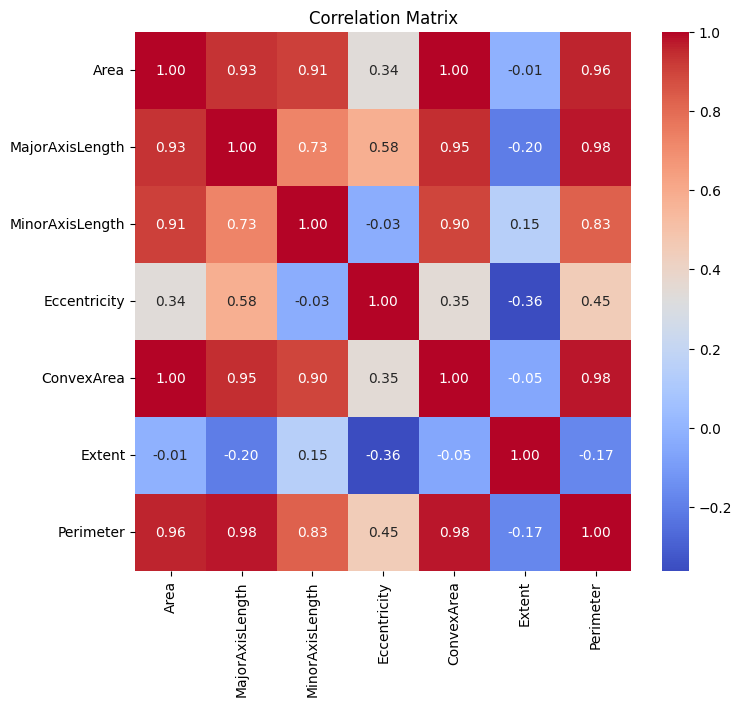

In [82]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=COLUMNS, yticklabels=COLUMNS)
plt.title("Correlation Matrix")
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [83]:
# Select two features (for example (Area and ConvexArea) and two more pair) according to their correlation
# Select these features from the original feature set
# Find a pair of features such that the separation between classes is at its highest level. Similarly, find a pair of features such that the separation between classes is at its lowest level. Finally, find the pair of features with average separability.
# Split the selected features into training and validation sets if not done yet

n = correlation_matrix.shape[0]
pairs = []
for i in range(n):
    for j in range(i+1, n):
        pairs.append((i, j, abs(correlation_matrix[i,j])))

# Find best, average and worst corelation pair
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)
best_pair = pairs_sorted[0][:2]
worst_pair = pairs_sorted[-1][:2]
avg_pair = pairs_sorted[len(pairs_sorted)//2][:2]

best_pair_train = X_train_scaled[:, best_pair]
worst_pair_train = X_train_scaled[:, worst_pair]
avg_pair_train = X_train_scaled[:, avg_pair]

best_pair_test = X_test_scaled[:, best_pair]
worst_pair_test = X_test_scaled[:, worst_pair]
avg_pair_test = X_test_scaled[:, avg_pair]

train_selected_datas = [best_pair_train, worst_pair_train, avg_pair_train]
test_selected_datas = [best_pair_test, worst_pair_test, avg_pair_test]

names = ["Best correlation","Worst correlation","Avg correlation"]

print("Best pair indices:", best_pair)
print("Worst pair indices:", worst_pair)
print("Average pair indices:", avg_pair)


Best pair indices: (0, 4)
Worst pair indices: (0, 5)
Average pair indices: (1, 3)


#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [84]:
models = []
for idx, data in enumerate(train_selected_datas):
  model_2 = Perceptron(shuffle=True,random_start=True,verbose=True)
  model_2.reset()
  model_2.fit(data, y_train)

  preds = model_2.predict(data)
  accuracy_train = accuracy_score(y_train,preds)
  models.append(model_2)
  print(f"Training Accuracy for {names[idx]}:", accuracy_train)
  print()

Weight and bias reset to 0 and None
Training procces is started


Training: 100%|██████████| 1000/1000 [00:06<00:00, 161.88it/s, best_accuracy=0.8504, epoch=1000, last_accuracy=0.4637]


Training Accuracy for Best correlation: 0.8503703703703703

Weight and bias reset to 0 and None
Training procces is started


Training: 100%|██████████| 1000/1000 [00:07<00:00, 136.75it/s, best_accuracy=0.8385, epoch=1000, last_accuracy=0.5111]


Training Accuracy for Worst correlation: 0.8385185185185186

Weight and bias reset to 0 and None
Training procces is started


Training: 100%|██████████| 1000/1000 [00:06<00:00, 161.91it/s, best_accuracy=0.8622, epoch=1000, last_accuracy=0.7659]

Training Accuracy for Avg correlation: 0.8622222222222222



2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

In [85]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model,title):
  """
  Visualize the decision boundary learned by a linear classifier (e.g., Perceptron) on 2D feature data.

  Parameters:
    X (numpy.ndarray): 2D feature matrix of shape (n_samples, 2),
                        where each row represents a data sample and each column a feature.
    y (numpy.ndarray): Class labels corresponding to each sample in X.
                        Expected values are typically -1 and 1.
    model (object): Trained model
    title (str): Title for the plot.
  """
  # Take weights and bias values
  w = model.weight
  b = model.bias

  # Find boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                        np.linspace(y_min, y_max, 300))

  # Contour for scatter plot labels
  Z = np.sign(w[0] * xx + w[1] * yy + b)
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8,7))
  plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2) # Add contour

  x0 = np.linspace(x_min, x_max, 100) # Create plot data
  x1 = - (w[0] / w[1]) * x0 - b / w[1] # Find y values of x0's

  plt.plot(x0, x1, 'k--', linewidth=2, label='Decision Boundary')

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=80)

  # Create limits
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")

  plt.title(title)
  plt.legend()
  plt.show()


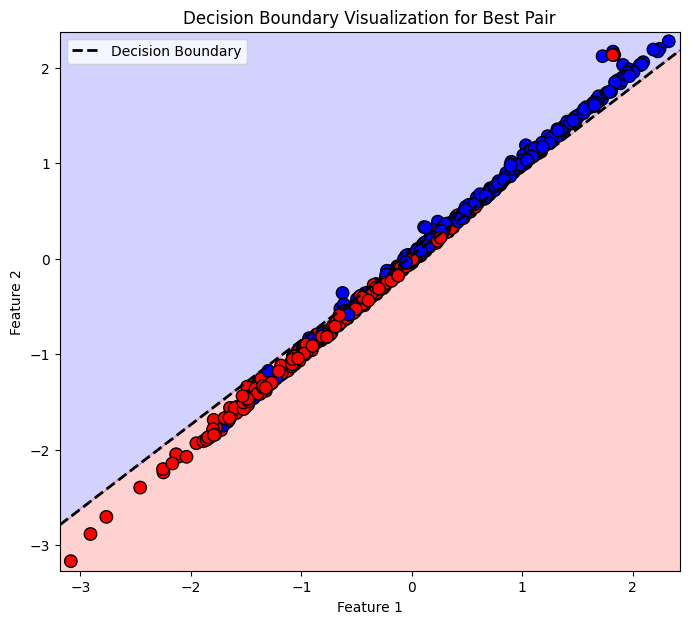

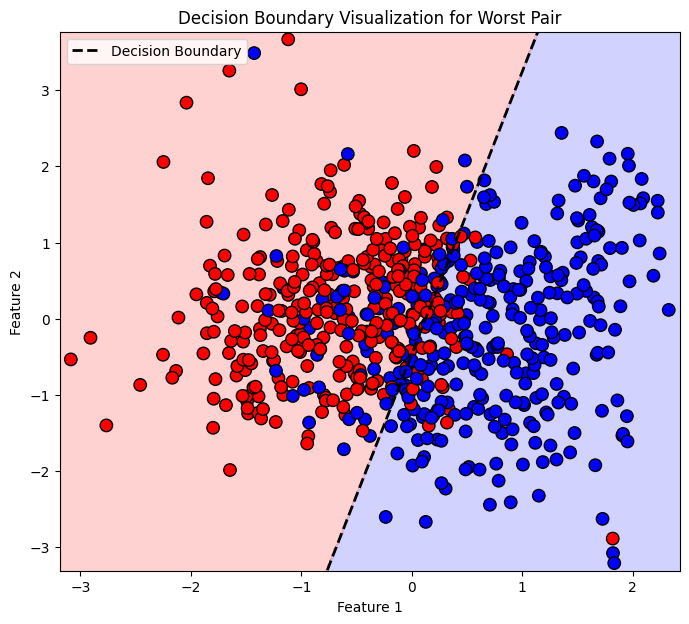

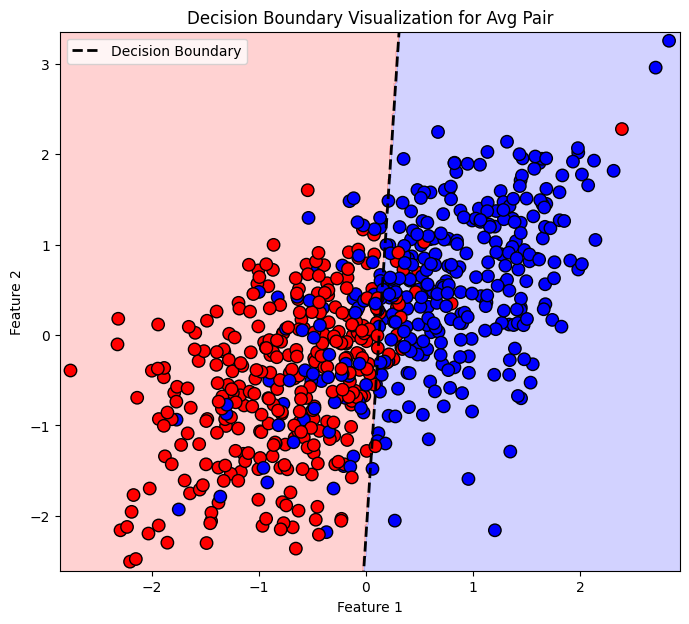

In [86]:
titles = ["Best Pair","Worst Pair","Avg Pair"]
for idx, data in enumerate(train_selected_datas):
  plot_decision_boundary(data,y_train,models[idx],f"Decision Boundary Visualization for {titles[idx]}")

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., Area and MaxorAxisLength) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

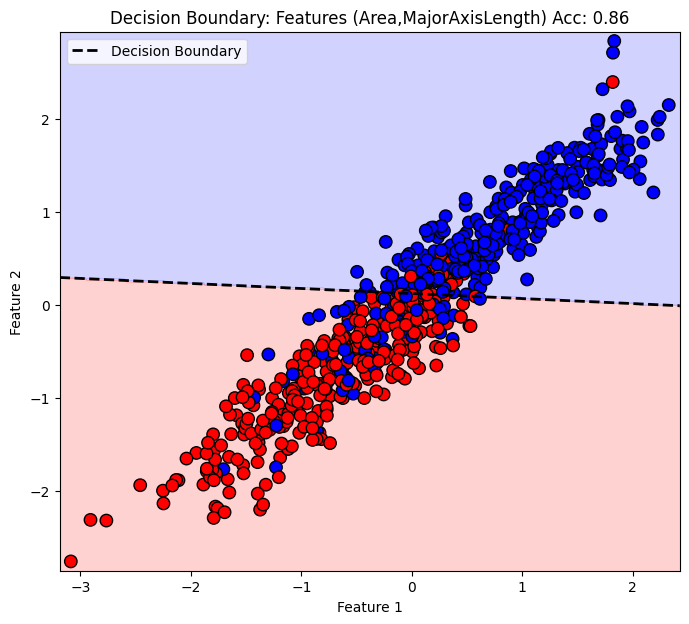

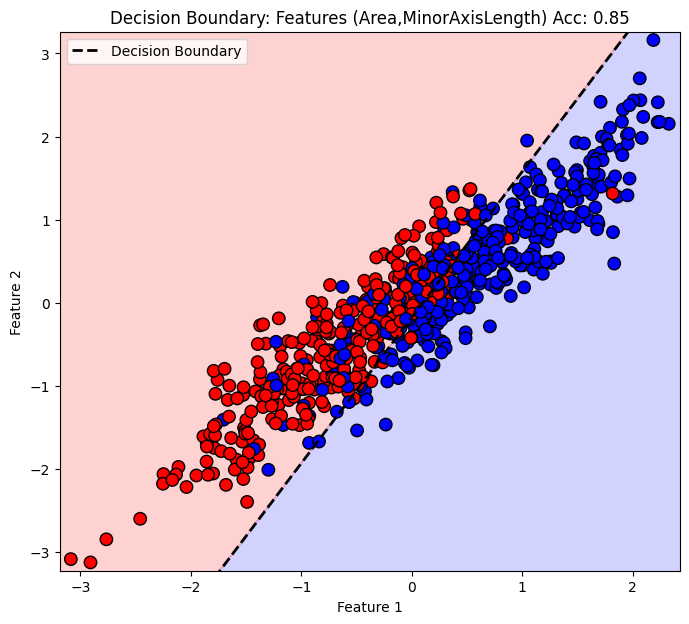

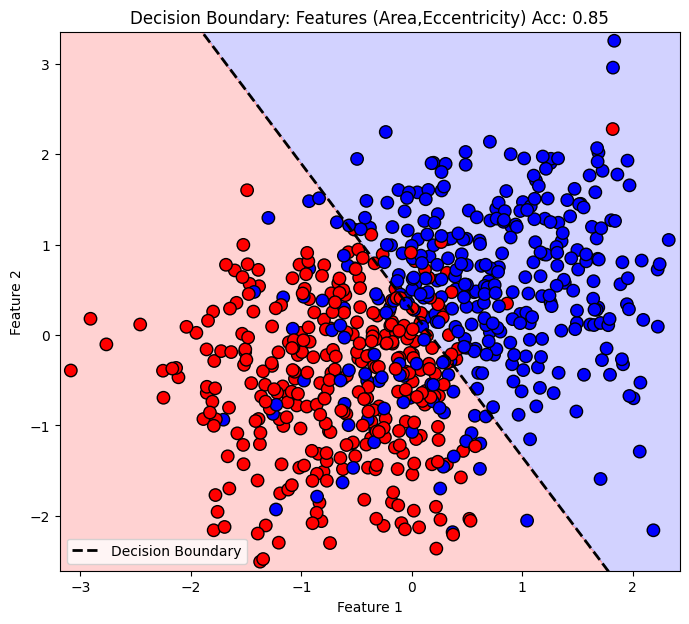

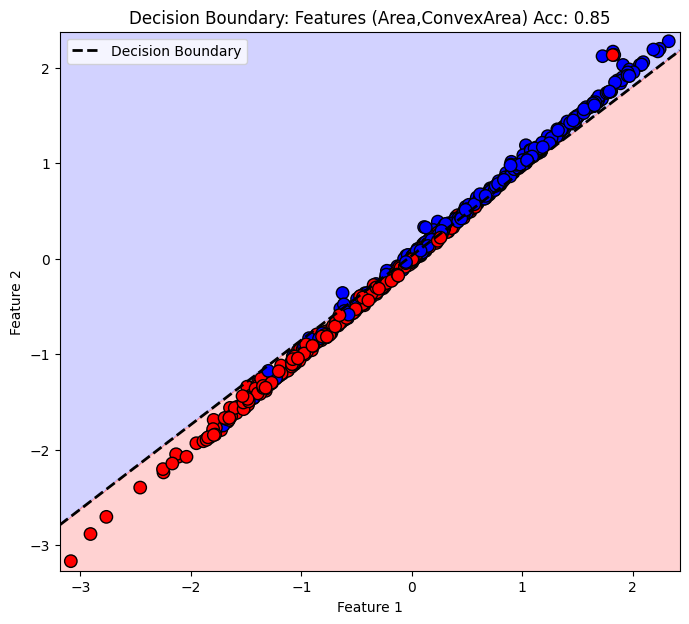

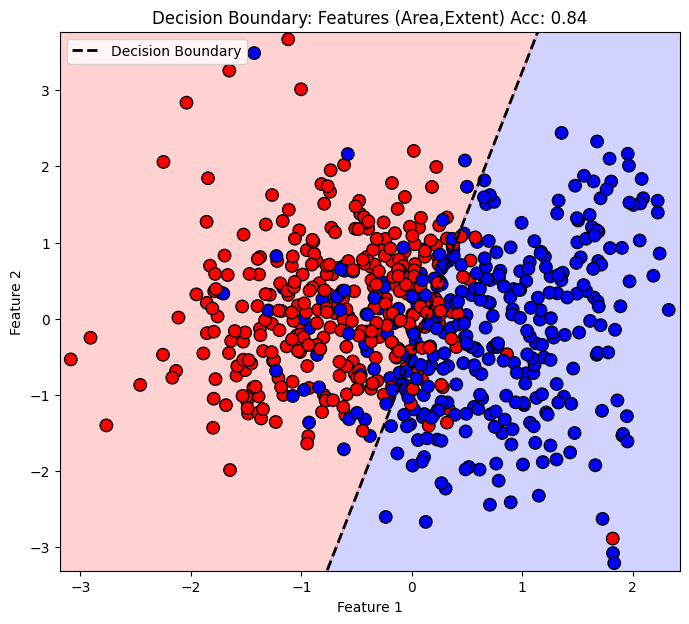

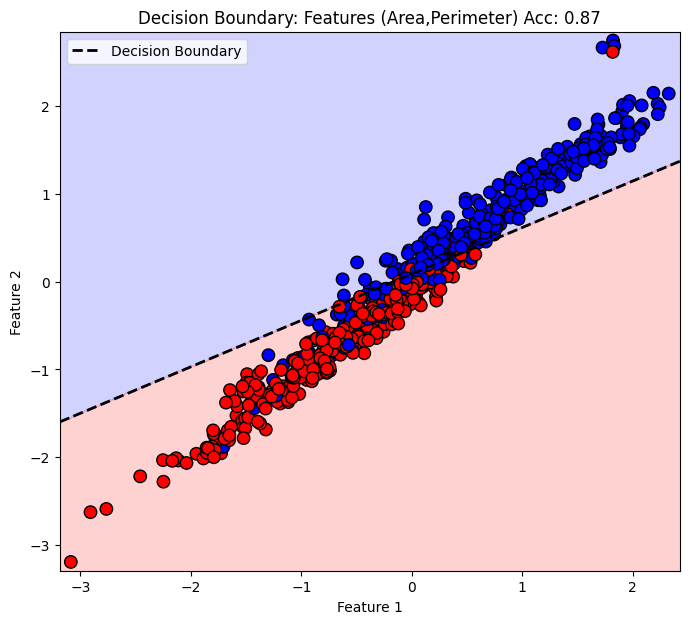

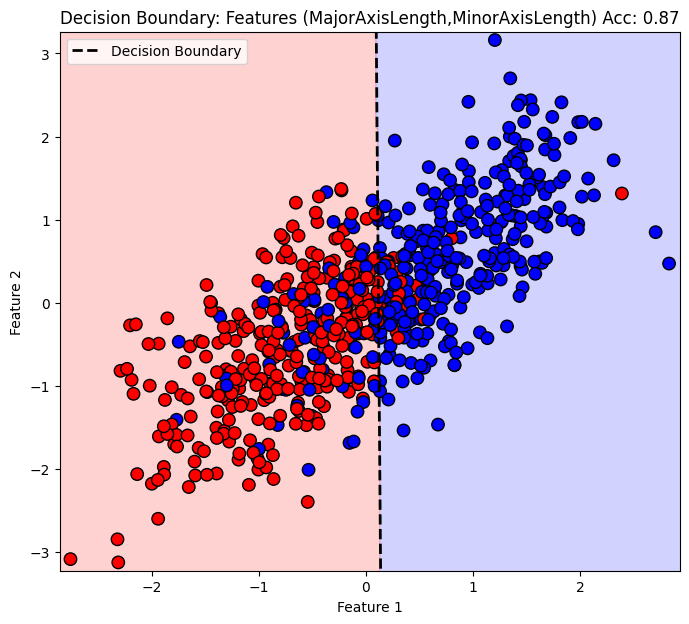

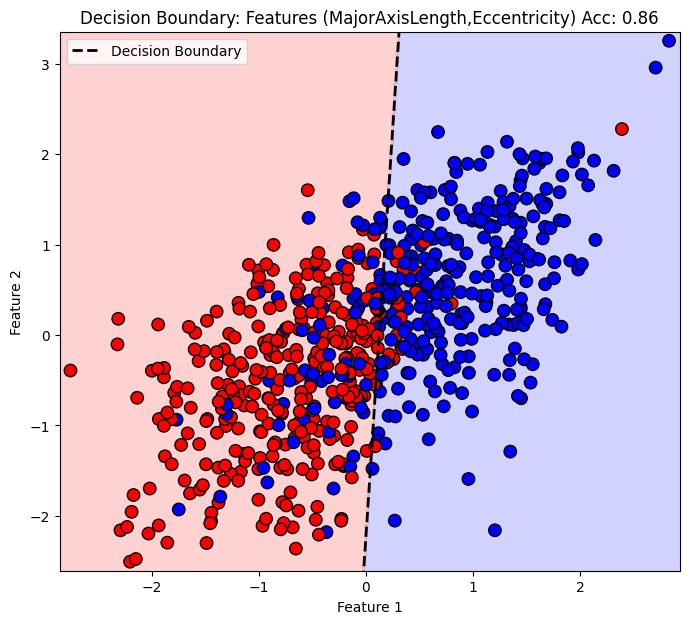

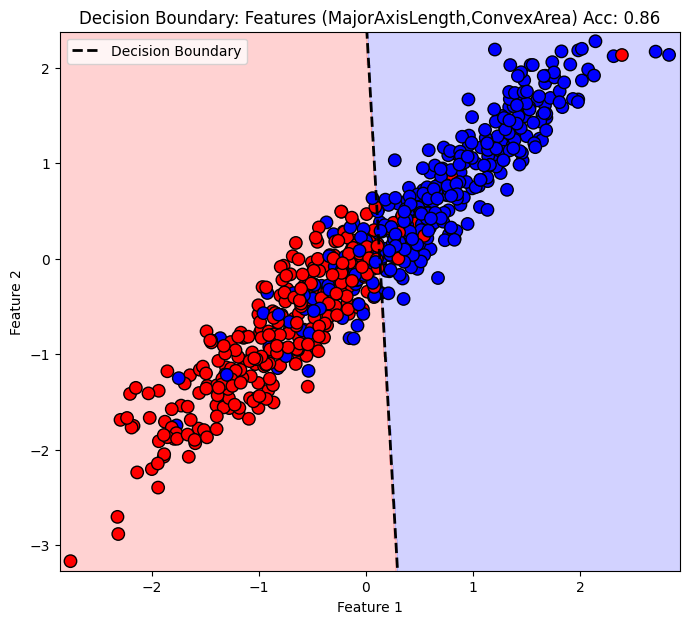

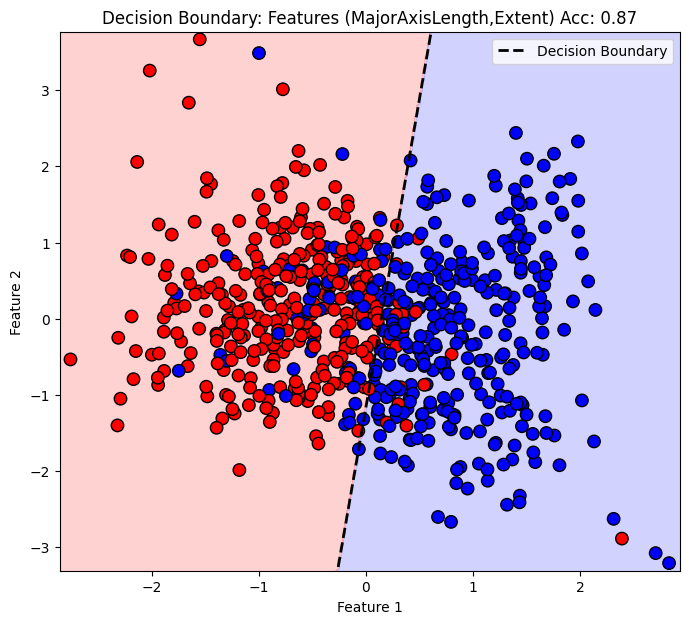

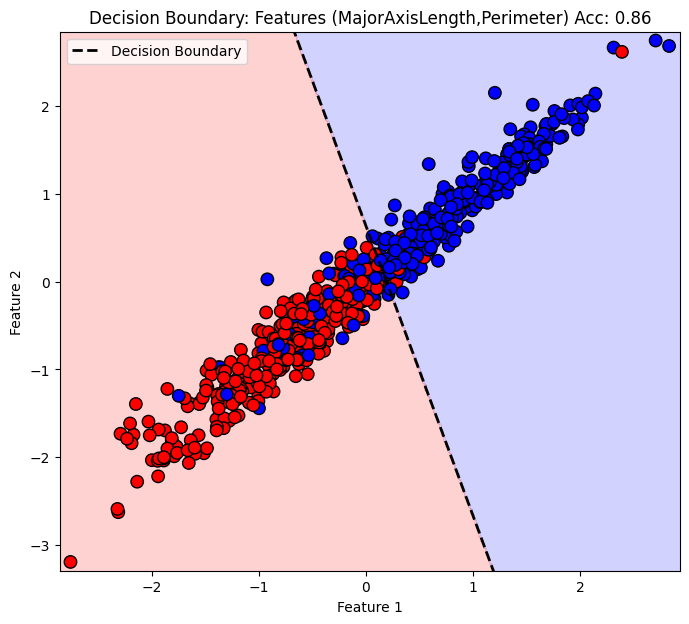

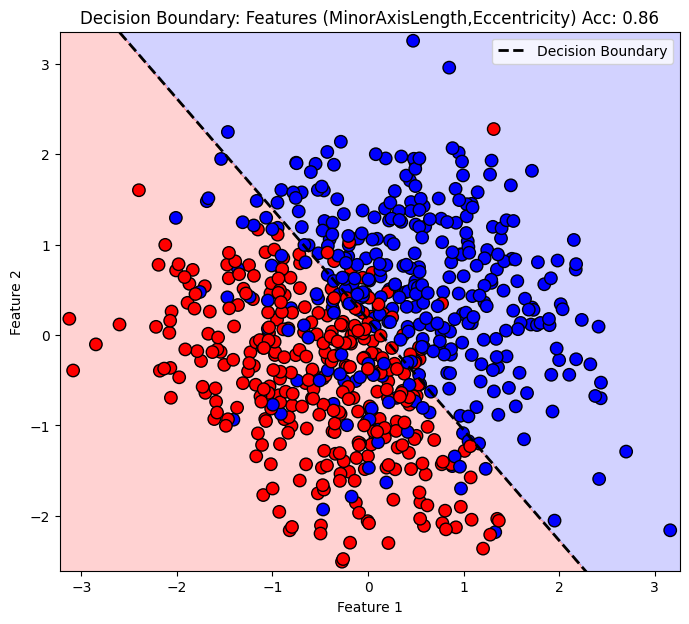

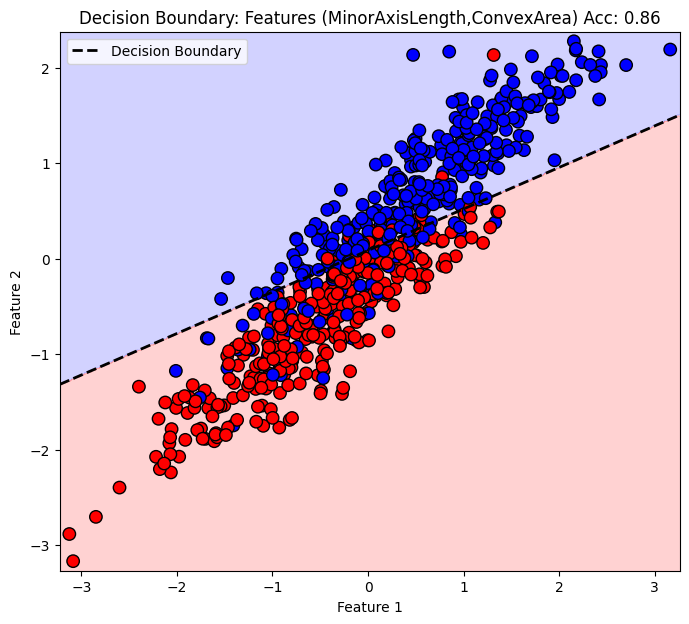

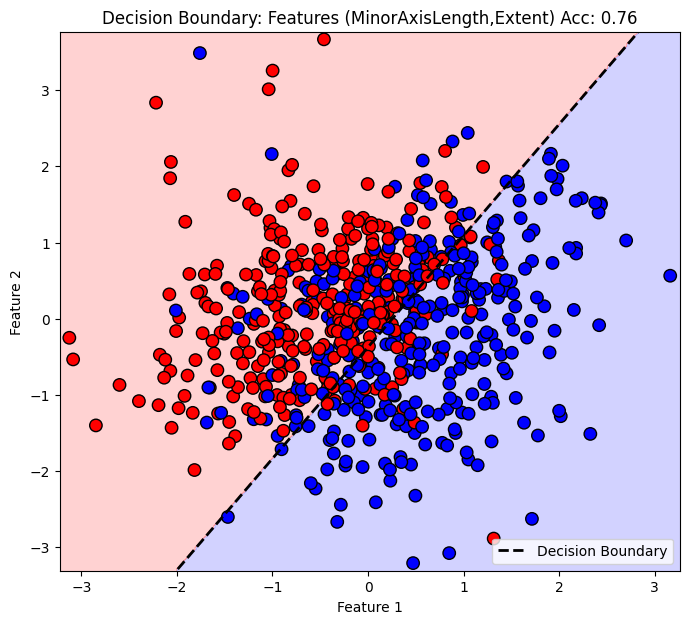

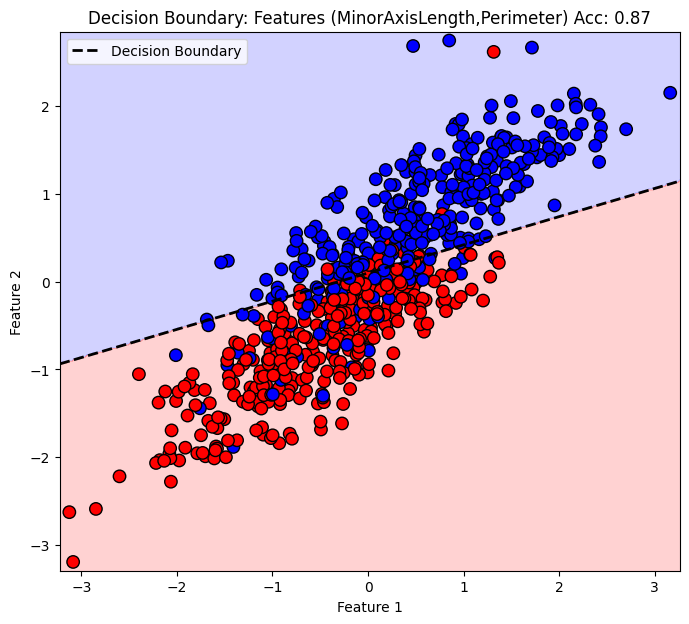

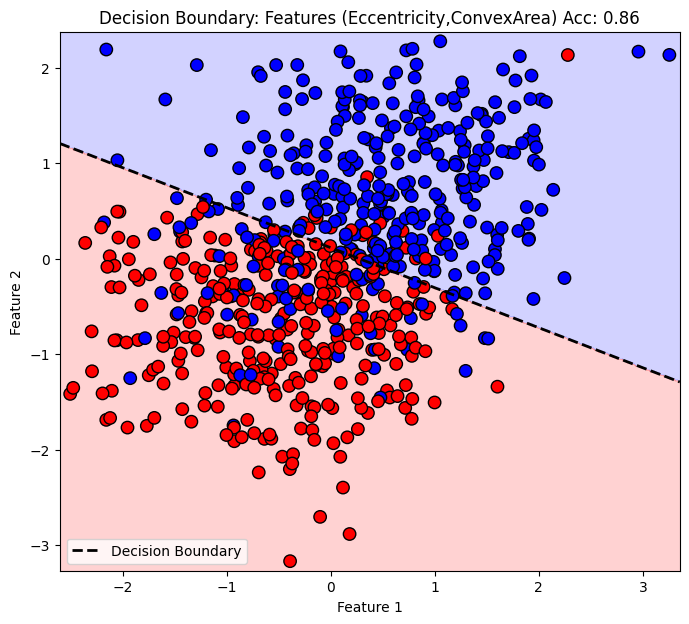

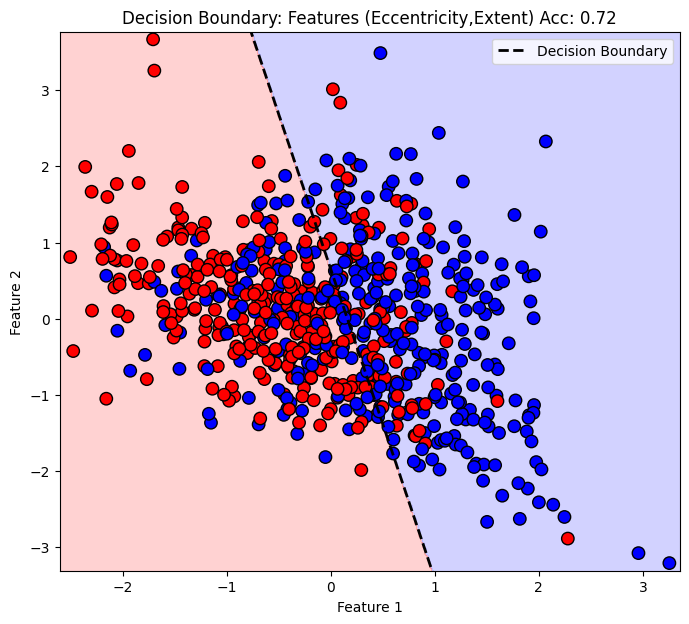

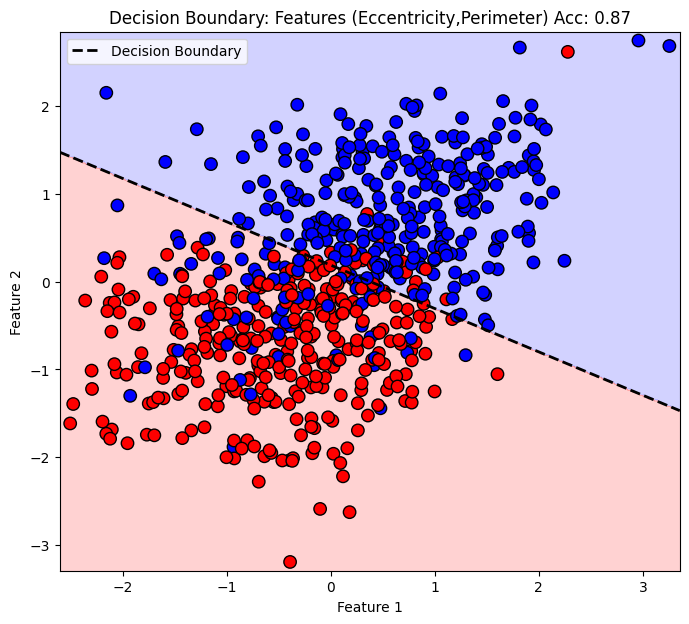

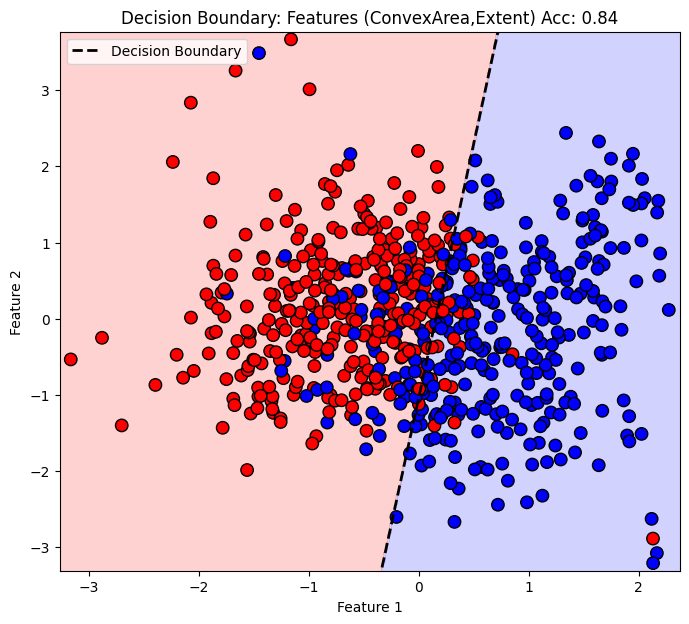

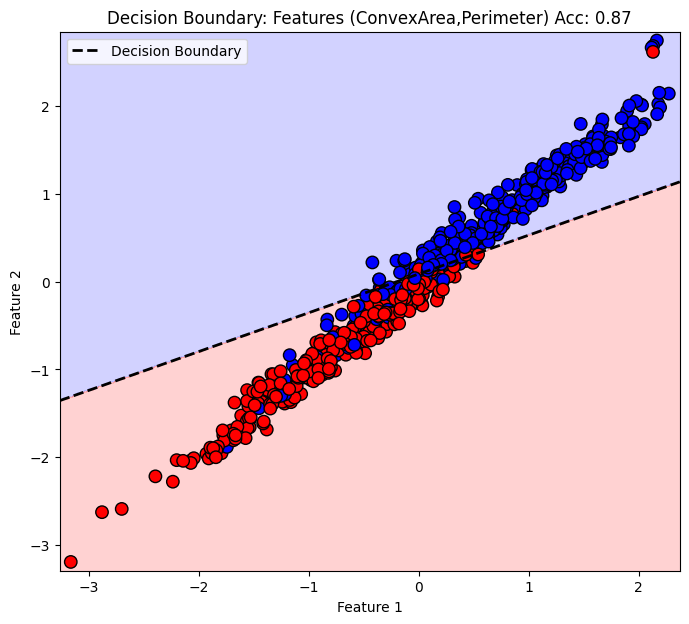

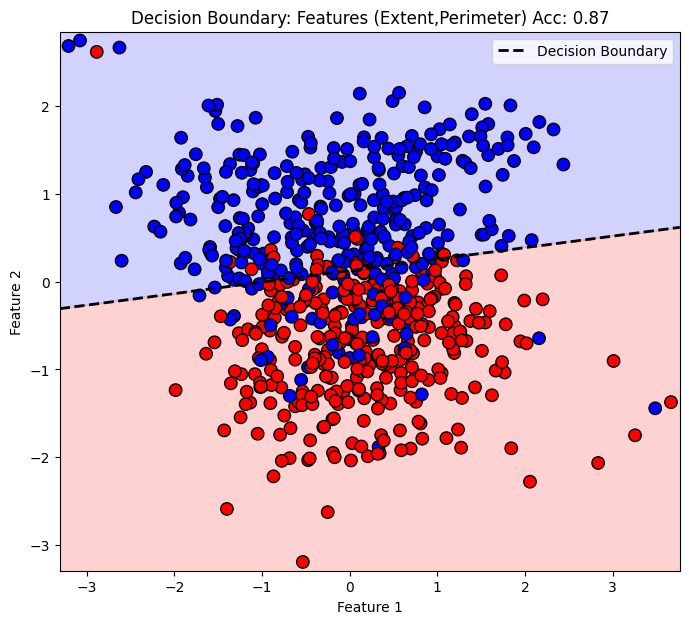

In [87]:
# Train model and create plot for all feature pairs
for first in range(N_FEATURES):
  for second in range(first+1,N_FEATURES):
    data = X_train_scaled[:,[first,second]]

    model = Perceptron(shuffle=True,random_start=True,random_state=42)
    model.reset()
    model.fit(data,y_train)

    preds = model.predict(data)
    accuracy_train = accuracy_score(y_train,preds)
    title = f"Decision Boundary: Features ({COLUMNS[first]},{COLUMNS[second]}) Acc: {accuracy_train:.2f}"

    plot_decision_boundary(data, y_train, model,title)


#### **Guiding Questions**
**1. How does the decision boundary change when you use different pairs of features?**

The decision boundary changes significantly depending on which feature pairs are selected. In the **highly correlated pair**, both features carry very similar information, so the samples form a diagonal alignment and the decision boundary becomes nearly parallel to this direction, resulting in limited separability. In the **low-correlation pair**, the samples are scattered more randomly, making the boundary unstable and less effective. However, in the **average-correlation pair**, where the features are neither redundant nor too independent, the Perceptron forms a clearer and more stable linear decision boundary. This indicates that moderately correlated features help the model better capture the discriminative direction between the two classes.

**2. Can you find a pair of features that leads to better separation between the two classes? Also explain why this feature pair causes the better separation.**

Yes, the average-correlation feature pair using MajorAxisLength and Eccentricity provided the best separation, achieving around 0.8622 accuracy. This pair contains complementary yet distinct information MajorAxisLength captures overall shape variation of the raisins, while Eccentricity reflects how elongated or round they are, providing additional detail about individual class differences. Because of this, the decision boundary formed by the Perceptron can align more effectively between the two classes. In contrast, the highly correlated pair adds redundant data that doesn’t improve separability, and the low-correlation pair introduces too much noise. Thus, balanced correlation between features yields the most effective class distinction.

**3. How does the decision boundary relate to the linearly separable nature of the data?**

The decision boundary directly reflects the degree of linear separability in the data. When the classes are nearly linearly separable, the Perceptron converges quickly to a clear, stable line dividing the two classes. However, in pairs where the data overlap significantly, the boundary fluctuates or forms at awkward angles, showing that no single linear separator can perfectly distinguish all points. Therefore, the decision boundary’s clarity and orientation visually demonstrate how close the dataset is to being linearly separable in that particular feature space.

**4. If the classes cannot be linearly separated in a given pair of features, can we still talk about a linear relationship between them? Explain your reasoning.**

Even if the classes cannot be perfectly separated by a straight line, the features themselves may still have a linear relationship. Non-linear separability means that a linear classifier cannot fully divide the classes, but it doesn’t imply the absence of a linear dependency between features. For instance, in the highly correlated pair, the two variables show a strong linear trend, one increases as the other increases, yet both classes follow this same trend, making it useless for separation. Therefore, linear dependence between features and linear separability of classes are related but distinct concepts.




#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of the dataset and progressively add more data points to train the Perceptron.

* For example, draw the decision boundary using the first 5% of the data, then increase it by 10% increments, continuing the process until the entire dataset is used, and draw the decision boundary at each step.


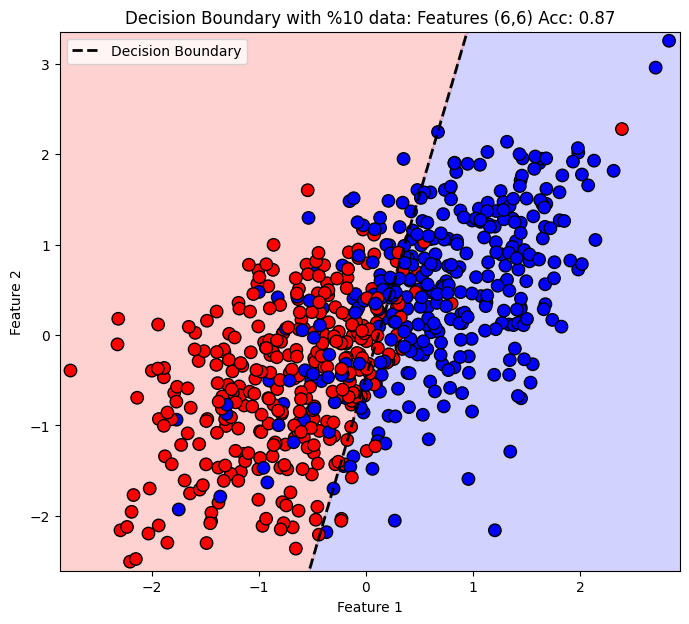

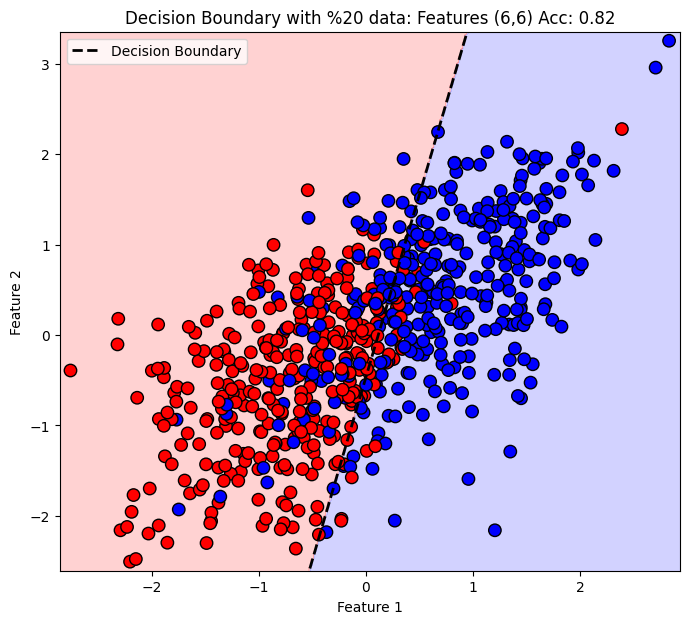

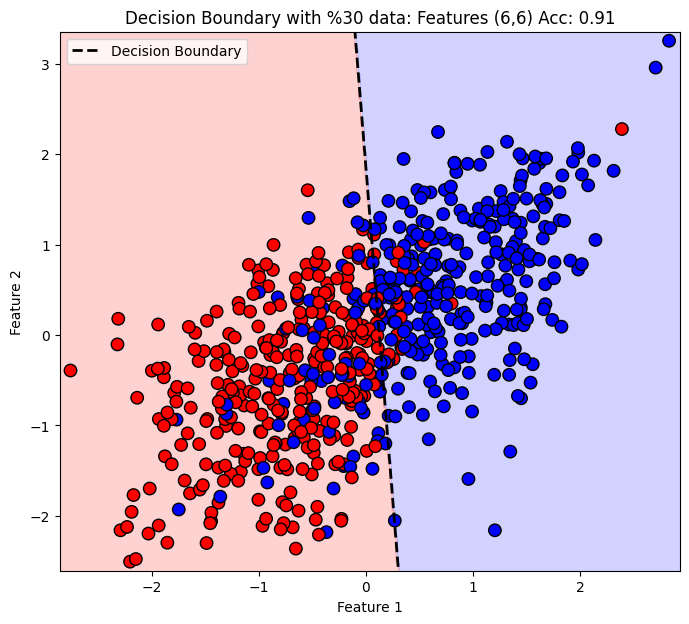

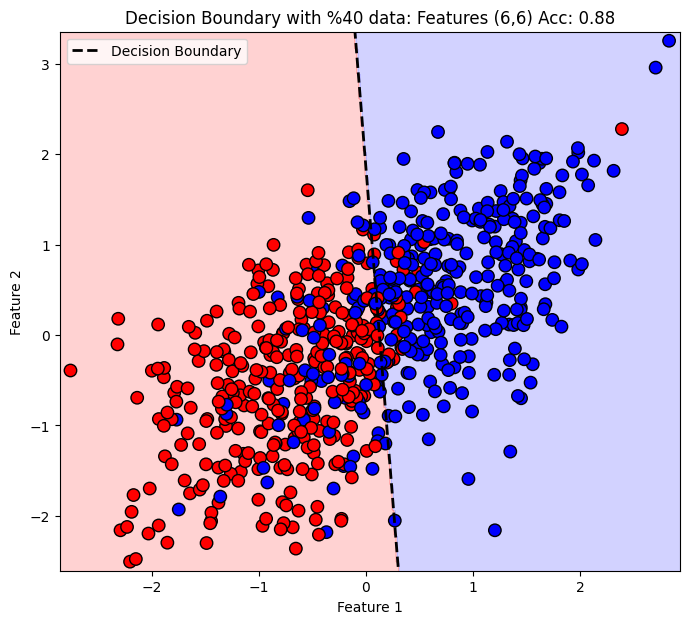

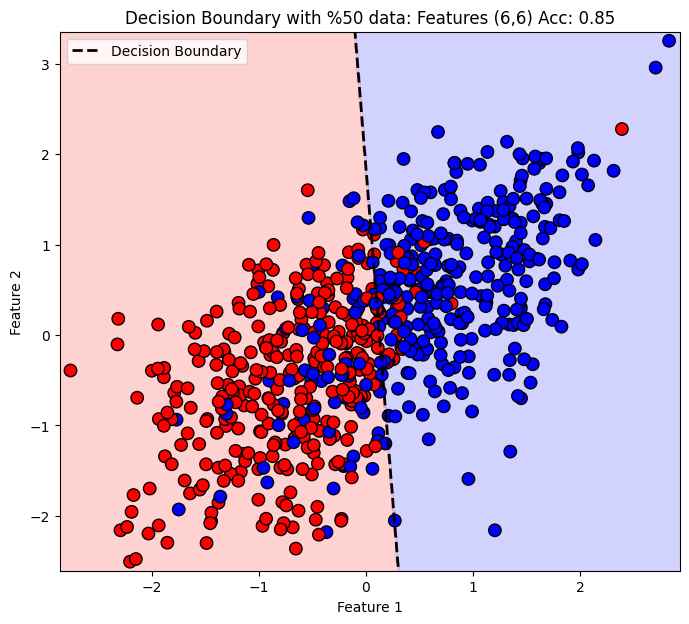

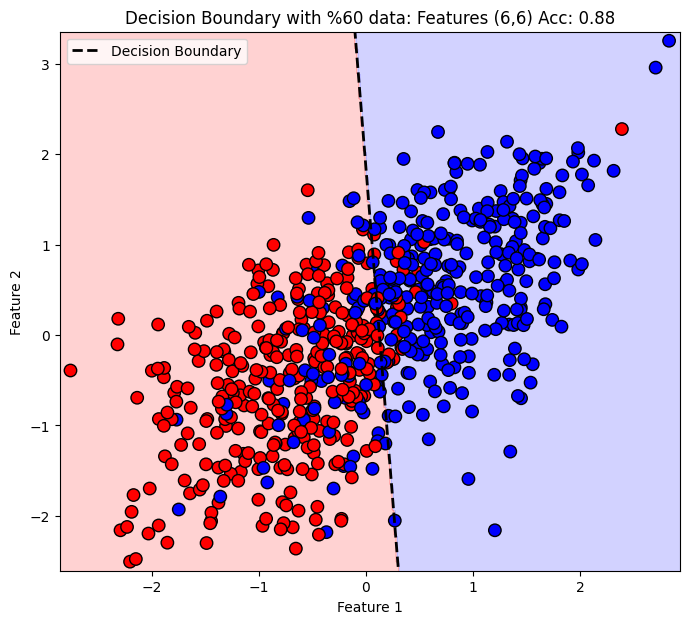

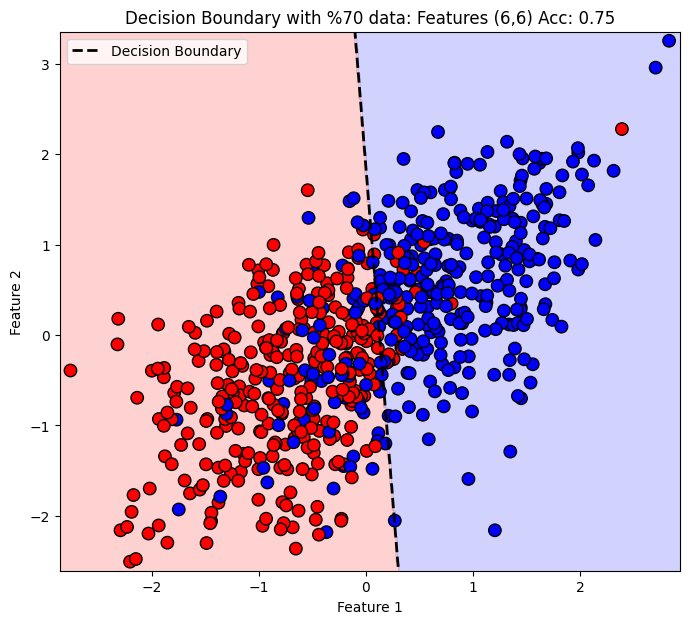

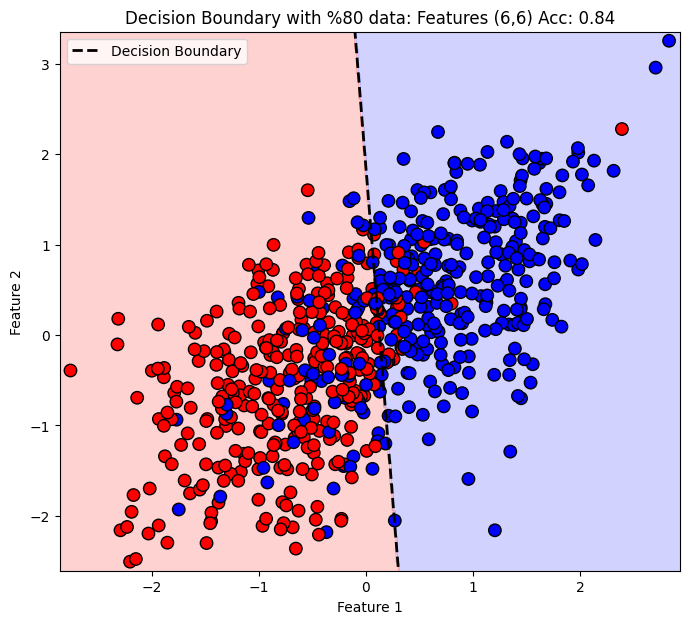

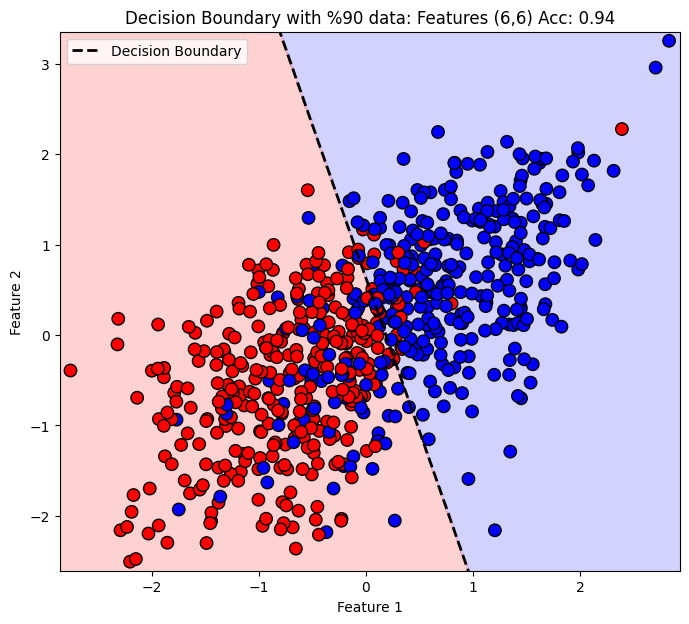

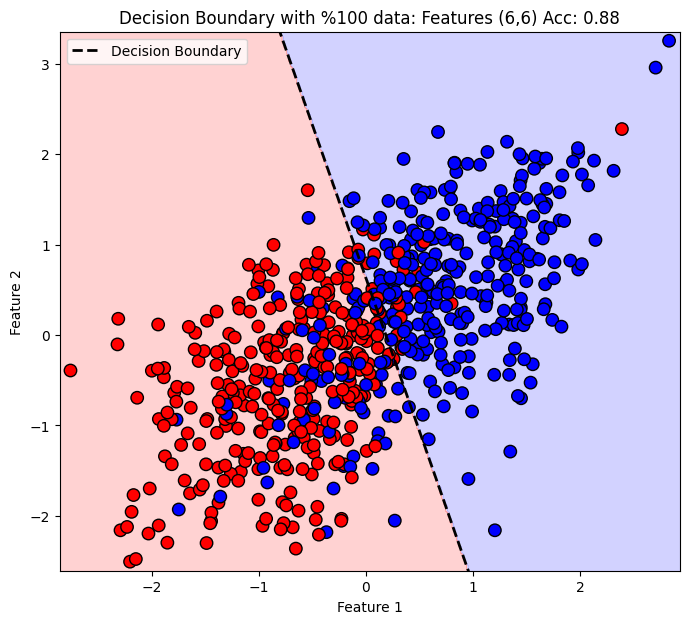

In [88]:

# Train incrementally add data model and create plots
model_3 = Perceptron(shuffle=True,random_start=True,random_state=42)
parts = np.linspace(0,len(avg_pair_train),11).astype(int) # Create data parts by using %10 fold

for i in range(len(parts)-1):
  model_3.fit(avg_pair_train[parts[i]:parts[i+1]],y_train[parts[i]:parts[i+1]])
  preds = model_3.predict(avg_pair_train[parts[i]:parts[i+1]])
  accuracy_train = accuracy_score(y_train[parts[i]:parts[i+1]],preds)

  plot_decision_boundary(avg_pair_train, y_train, model_3,f"Decision Boundary with %{(i+1)*10} data: Features ({first},{second}) Acc: {accuracy_train:.2f}")
  plt.show()

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

In this experiment, the data was incrementally increased by 10% at each step. As new samples were added, the model’s performance first rose and then fell temporarily. This fluctuation occurred because the Perceptron continuously tried to adapt to the newly added data, adjusting the decision boundary to accommodate the new patterns. Once enough data was incorporated, the model stabilized, showing that it had successfully integrated the additional information and established a consistent boundary that generalized well across the feature space.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)
* In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [89]:
def fisher_ld_projection(X, y):
  """
  Compute Fisher's Linear Discriminant (FLD) projection direction.

  Parameters:
    X (numpy.ndarray): Feature matrix where each row is a sample and each column is a feature.
    y (numpy.ndarray): Class labels corresponding to samples in X. Expected values are -1 and 1.

  Returns:
    numpy.ndarray: Normalized projection direction vector `w` for Fisher’s Linear Discriminant.
  """
  # Find labels
  class0 = X[y == -1]
  class1 = X[y == 1]

  # Find means
  mean0 = np.mean(class0, axis = 0)
  mean1 = np.mean(class1, axis = 0)

  # Find Sw matrix
  s0 = np.dot(np.transpose((class0-mean0)), (class0-mean0))
  s1 = np.dot(np.transpose((class1-mean1)), (class1-mean1))
  sw = s0 + s1

  w = np.dot(np.linalg.inv(sw),(mean1-mean0))

  w = w/np.linalg.norm(w)

  return w


def project_data(X, w):
  """
  Project data onto the Fisher Linear Discriminant direction.

  Parameters:
    X (numpy.ndarray): Feature matrix to be projected.
    w (numpy.ndarray): Fisher’s Linear Discriminant projection direction.

  Returns:
    numpy.ndarray: One-dimensional array of projected data points.
  """
  projected_data = np.dot(X, w)
  return projected_data


In [90]:
direction = fisher_ld_projection(X, y)

projected_data = project_data(X, direction)

### Visualizations
#### 2D Feature Space (Optional but Recommended)
* While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

In [91]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
# Adjust this to control the length of the direction line

scale = 4

In [92]:
def plot_fisher_direction(X, y, w, scale=4):
  """
  Visualize 2D data along with Fisher's Linear Discriminant direction.

  Parameters:
    X (numpy.ndarray): 2D feature matrix with shape (n_samples, 2).
    y (numpy.ndarray): Class labels corresponding to samples in X. Expected values are -1 and 1.
    w (numpy.ndarray): Fisher’s Linear Discriminant projection direction.
    scale (float, optional): Controls the visual length of the direction vector. Default is 4.
  """
  # Create figure
  plt.figure(figsize=(8, 7))

  # Create scatter tables
  plt.scatter(X[y == -1, 0], X[y == -1, 1], alpha=0.3, label="Besni", color='purple')
  plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.3, label="Kecimen", color='orange')

  # Center mean
  mean_all = np.mean(X, axis=0)

  # Draw direction arrow
  plt.quiver(
      mean_all[0], mean_all[1],
      w[0] * scale, w[1] * scale,
      angles='xy', scale_units='xy', scale=scale,
      color='green', width=0.01, label="Fisher Direction"
  )

  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.legend()
  plt.title("Fisher's Linear Discriminant in 2D Feature Space")
  plt.show()


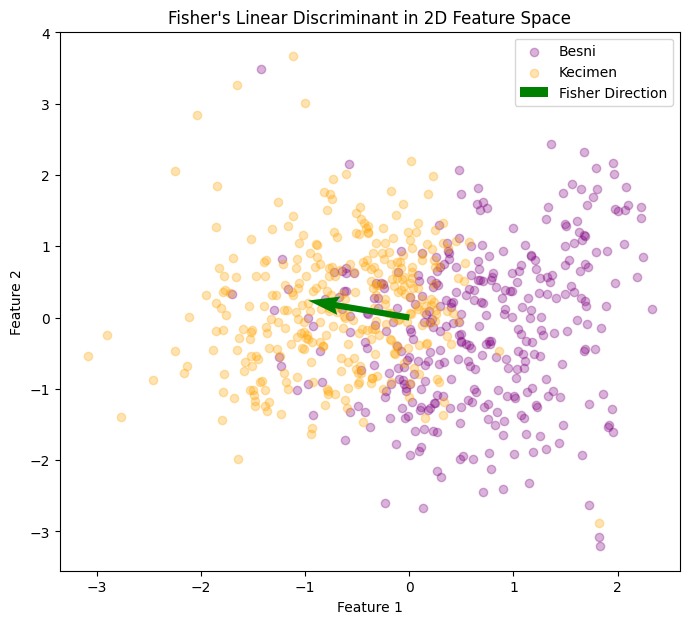

In [93]:
direction_2d = fisher_ld_projection(worst_pair_train, y_train)

plot_fisher_direction(worst_pair_train,y_train,direction_2d)

### 1D Projected Space (Required)
* Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

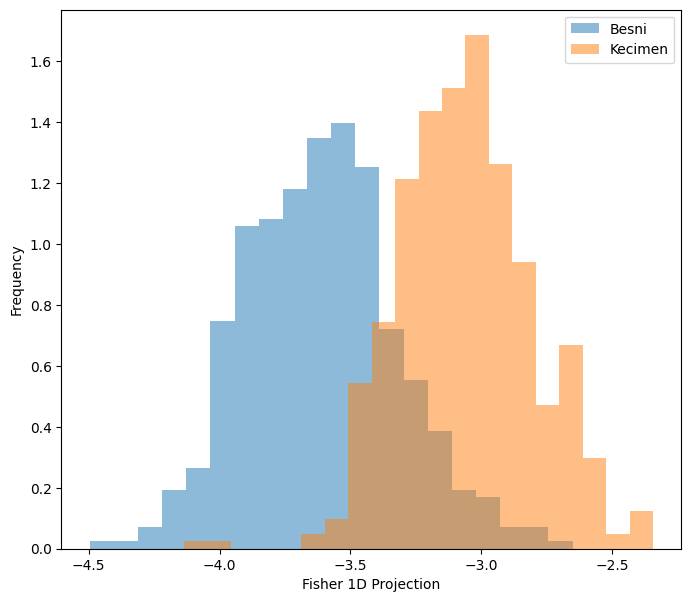

In [94]:
# Plot the histogram of the projected data
plt.figure(figsize=(8, 7))
plt.hist(projected_data[y==-1], bins=20, alpha=0.5, label='Besni',density=True)
plt.hist(projected_data[y==1], bins=20, alpha=0.5, label='Kecimen',density=True)
plt.xlabel('Fisher 1D Projection')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **Guiding Questions**

**1) How well does Fisher’s LD separate the two classes in the 1D projected space?**

Fisher’s Linear Discriminant performs dimensionality reduction by projecting the data onto a line that maximizes the distance between the class means while minimizing the variance within each class. This fundamental principle ensures the resulting 1D projection is the optimal linear direction for class distinction.

In the 1D projected space, the two raisin classes become more compact and separated along this single axis. The overlap between the two class distributions is significantly reduced compared to their raw feature distributions, showing that Fisher’s LD effectively captures the most discriminative direction between the classes.

When examining the histogram of the projected data, the separation achieved by Fisher’s LD becomes clearly visible. The class means are distinctly apart: the blue “Besni” class peaks around −3.7 to −3.5, while the orange “Kecimen” class peaks around −3.1 to −2.9. This substantial distance between their peaks demonstrates that Fisher’s LD successfully maximizes inter-class separation. The small overlap region only involves the tail parts of the distributions, indicating minimal classification ambiguity. Consequently, a simple threshold could effectively separate the two classes in this 1D space, proving that Fisher’s LD transforms a complex 2D separation problem into an easily solvable linear decision boundary.

**2) Compare the separation of the two classes in the original 2D space (used in the Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the class distributions in these spaces?**

In the original 2D space, the data points are spread across two dimensions, and the separation boundary depends on the specific orientation of the data. Some regions still show overlap or irregular class boundaries, requiring the Perceptron to find a linear boundary that may not necessarily be the most effective for maximum separation. However, the transformation into the 1D Fisher projection simplifies the problem. The resulting distributions, as seen in the histogram, reveal that Fisher’s LD successfully found an optimal axis: the classes are aligned along a single axis that maximizes the ratio of between-class variance to within-class variance. Specifically, the Besni class distribution is centered around the range of −3.7 to −3.5, while the Kecimen classis centered around −3.1 to −2.9. This clear shift in the means demonstrates that the projection effectively distilled the most relevant discriminative information. While there is still a manageable overlap region, the classes primarily appear as two distinct, unimodal peaks with significantly reduced intermingling compared to what would be expected in an arbitrary 1D projection or the original 2D space. This transformation allows the complex 2D classification problem to be effectively solved by setting a simple threshold in the 1D space.

**3) What insights can you gain from using Fisher’s LD for dimensionality reduction and class separation?**

By projecting high-dimensional features onto the most discriminative linear axis, Fisher’s LD reveals how well the classes can be distinguished using purely linear relationships. This helps identify whether the underlying data is linearly separable or if non-linear boundaries might be necessary. Additionally, it exposes which directions in the feature space carry the most class-discriminative information, simplifying visualization and interpretation. Overall, Fisher’s LD not only reduces dimensional complexity but also provides a clear, interpretable understanding of how distinct the classes truly are in the dataset.